## Mohs Hardness Regression Project Results

<table>
    <tr>
        <th>Phase</th>
        <th>Description</th>
        <th>Outcome</th>
    </tr>
    <tr>
        <td><span style="color:blue">📊 Data Exploration</span></td>
        <td><span style="color:blue">Exploring and analyzing the dataset</span></td>
        <td><span style="color:blue">Insights into key features and patterns</span></td>
    </tr>
    <tr>
        <td><span style="color:green">🛠️ Model Development</span></td>
        <td><span style="color:green">Building and training regression models</span></td>
        <td><span style="color:green">Predictive models for Mohs hardness</span></td>
    </tr>
    <tr>
        <td><span style="color:orange">📈 Performance Evaluation</span></td>
        <td><span style="color:orange">Assessing model accuracy and reliability</span></td>
        <td><span style="color:orange">Quantitative evaluation metrics</span></td>
    </tr>
    <tr>
        <td><span style="color:red">🔄 Model Optimization</span></td>
        <td><span style="color:red">Fine-tuning and improving model performance</span></td>
        <td><span style="color:red">Enhanced prediction accuracy</span></td>
    </tr>
</table>

## Project Overview
The Mohs Hardness Regression project aimed to predict the Mohs hardness of minerals based on various features. The project involved data exploration, model development, performance evaluation, and model optimization to achieve accurate predictions.

## Project Objectives:
1. **Data Exploration:**
   - Conducted in-depth exploration and analysis of the dataset to understand feature distributions and relationships.
   - Identified key factors influencing Mohs hardness through visualizations and statistical analysis.

2. **Model Development:**
   - Implemented regression models to predict Mohs hardness using relevant features.
   - Utilized machine learning techniques for feature selection and model training.

3. **Performance Evaluation:**
   - Evaluated model performance using metrics such as Mean Absolute Error (MAE) and R-squared to gauge prediction accuracy.
   - Analyzed model strengths and limitations through visualizations and statistical assessments.

4. **Model Optimization:**
   - Fine-tuned hyperparameters and conducted feature engineering to optimize model performance.
   - Iteratively improved models to achieve higher accuracy in Mohs hardness prediction.

## Data Set Description:
The dataset consisted of mineral samples with various features such as chemical composition, crystalline structure, and density. The target variable was the Mohs hardness rating.

| Information       | Details       |
|-------------------|---------------|
| Number of Samples | [Number]      |
| Features          | [List of Features] |
| Target Variable   | Mohs Hardness  |

### Project Steps:
**Data Exploration:**
- Explored and visualized feature distributions, correlations, and potential outliers.
- Identified significant features affecting Mohs hardness.

**Model Development:**
- Implemented regression models such as Linear Regression, Decision Trees, and Random Forest for prediction.
- Split the dataset into training and testing sets for model training and evaluation.

**Performance Evaluation:**
- Utilized metrics like MAE and R-squared to evaluate model accuracy.
- Visualized predicted vs. actual Mohs hardness values for qualitative assessment.

**Model Optimization:**
- Fine-tuned hyperparameters and conducted cross-validation for optimal model configuration.
- Addressed overfitting or underfitting issues through regularization techniques.

### Technologies Used:
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Scikit-Learn for Machine Learning
- Jupyter Notebooks for Analysis and Visualization

The successful implementation of the Mohs Hardness Regression project provides valuable insights into predicting mineral hardness, with applications in geology, material science, and industry.


## 1. Data Loading and Exploration

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import StandardScaler

from scipy.stats import zscore

# Models 
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load Data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
start_time = time.time()

In [4]:
# Pandas setting to display more dataset rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
print('\nTrain Dataset:')
train.head()


Train Dataset:


id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0           100.00000        0.84161              10.00000        4.80000   
1   1           100.00000        7.55849              10.00000        4.80000   
2   2            76.00000        8.88599              15.60000        5.60000   
3   3           100.00000        8.79530              10.00000        4.80000   
4   4           116.00000        9.57800              11.60000        4.80000   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0              20.61253           11.08810             2.76600   
1              20.29889           12.04083             2.75500   
2              33.73926           12.08630             2.82800   
3              20.21335           10.94850             2.64800   
4              24.98813           11.82448             2.76600   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                1.73200                0.86000          0.49607   
1                1.63100                0.91000          0.49272   
2                1.78800                0.86400          0.48148   
3                1.62600                0.93600          0.48927   
4                1.68200                0.89600          0.49274   

   density_Average  Hardness  
0          0.91457   6.00000  
1          0.71760   6.50000  
2          1.50633   2.50000  
3          0.78937   6.00000  
4          1.86481   6.00000

In [6]:
print('\nTest Dataset:')
test.head()


Test Dataset:


id  allelectrons_Total  density_Total  allelectrons_Average  \
0  10407           884.00000      121.42000              35.36000   
1  10408            90.00000        9.93196              18.00000   
2  10409           116.00000        7.76799              11.60000   
3  10410           100.00000        9.10800              10.00000   
4  10411            55.00000        4.03000              11.00000   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0        5.28000              82.56124            9.37038             2.29800   
1        5.60000              39.56806           12.08630             2.86800   
2        4.80000              23.23182           11.02384             2.64400   
3        4.80000              20.29889           12.08630             2.82800   
4        4.00000              22.97767           11.28095             2.45500   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                1.90720                1.20000          0.46190   
1                1.65200                0.86400          0.47620   
2                1.79400                0.96000          0.49951   
3                1.66200                0.79200          0.49580   
4                1.75000                0.89333          0.47609   

   density_Average  
0          1.79459  
1          1.41194  
2          0.78834  
3          1.20466  
4          0.93456

In [7]:
print('\nSubmission Dataset:')
sample_submission.head()


Submission Dataset:


id  Hardness
0  10407   4.64700
1  10408   4.64700
2  10409   4.64700
3  10410   4.64700
4  10411   4.64700

In [8]:
print('\nTrain Dataset İnfo:')
train.info()


Train Dataset İnfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [9]:
print('\nTest Dataset İnfo:')
test.info()


Test Dataset İnfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [10]:
print('\nSubmission Dataset İnfo:')
sample_submission.info()


Submission Dataset İnfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6939 non-null   int64  
 1   Hardness  6939 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 108.5 KB


In [11]:
print('\nTrain Dataset Describe:')
train.describe()


Train Dataset Describe:


id  allelectrons_Total  density_Total  allelectrons_Average  \
count 10407.00000         10407.00000    10407.00000           10407.00000   
mean   5203.00000           128.05352       14.49134              17.03322   
std    3004.38646           224.12378       15.97288              10.46873   
min       0.00000             0.00000        0.00000               0.00000   
25%    2601.50000            68.00000        7.55849              10.00000   
50%    5203.00000           100.00000       10.65000              12.60000   
75%    7804.50000           131.00000       16.67700              22.00000   
max   10406.00000         15300.00000      643.09380              67.00000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count    10407.00000           10407.00000        10407.00000   
mean         4.54679              37.50770           10.93831   
std          0.69086              26.01231            1.40828   
min          0.00000               0.00000            0.00000   
25%          4.00000              20.29889           10.59066   
50%          4.71429              26.20383           11.20276   
75%          4.80000              48.71950           11.67073   
max          6.00000             167.40000           15.24581   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count         10407.00000            10407.00000            10407.00000   
mean              2.60766                1.73133                0.94413   
std               0.33491                0.19248                0.18002   
min               0.00000                0.00000                0.00000   
25%               2.53000                1.67250                0.86400   
50%               2.70600                1.73273                0.91556   
75%               2.80500                1.80000                0.98167   
max               3.44300                2.25000                1.61584   

       zaratio_Average  density_Average    Hardness  
count      10407.00000      10407.00000 10407.00000  
mean           0.49335          2.13298     4.64713  
std            0.06308          1.93666     1.68053  
min            0.00000          0.00000     1.00000  
25%            0.47620          0.81480     3.00000  
50%            0.48855          1.35155     5.50000  
75%            0.49607          2.74155     6.00000  
max            0.82599         10.97000    10.00000

In [12]:
print('\nTest Dataset Describe:')
test.describe()


Test Dataset Describe:


id  allelectrons_Total  density_Total  allelectrons_Average  \
count  6939.00000          6939.00000     6939.00000            6939.00000   
mean  13876.00000           126.46013       14.79402              17.40619   
std    2003.26109           207.56450       18.98245              10.99609   
min   10407.00000             0.00000        0.00000               0.00000   
25%   12141.50000            68.00000        7.55849              10.00000   
50%   13876.00000           100.00000       10.65000              12.66667   
75%   15610.50000           128.00000       16.60133              22.00000   
max   17345.00000         10116.00000      643.09380              67.00000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count     6939.00000            6939.00000         6939.00000   
mean         4.54685              38.42279           10.92151   
std          0.68316              27.34435            1.37898   
min          0.00000               0.00000            0.00000   
25%          4.00000              20.29889           10.58431   
50%          4.75000              26.20383           11.20276   
75%          4.80000              48.71950           11.64556   
max          6.00000             167.40000           15.24581   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count          6939.00000             6939.00000             6939.00000   
mean              2.60812                1.73791                0.94964   
std               0.32287                0.19058                0.17927   
min               0.00000                0.00000                0.00000   
25%               2.52750                1.67800                0.86667   
50%               2.70600                1.73600                0.92000   
75%               2.80667                1.82000                0.99000   
max               3.44300                2.25000                1.61533   

       zaratio_Average  density_Average  
count       6939.00000       6939.00000  
mean           0.49167          2.15207  
std            0.06083          1.95821  
min            0.00000          0.00000  
25%            0.47609          0.81244  
50%            0.48855          1.35155  
75%            0.49612          2.78022  
max            0.82599         10.97000

## 2. Exploratory Data Analysis (EDA)

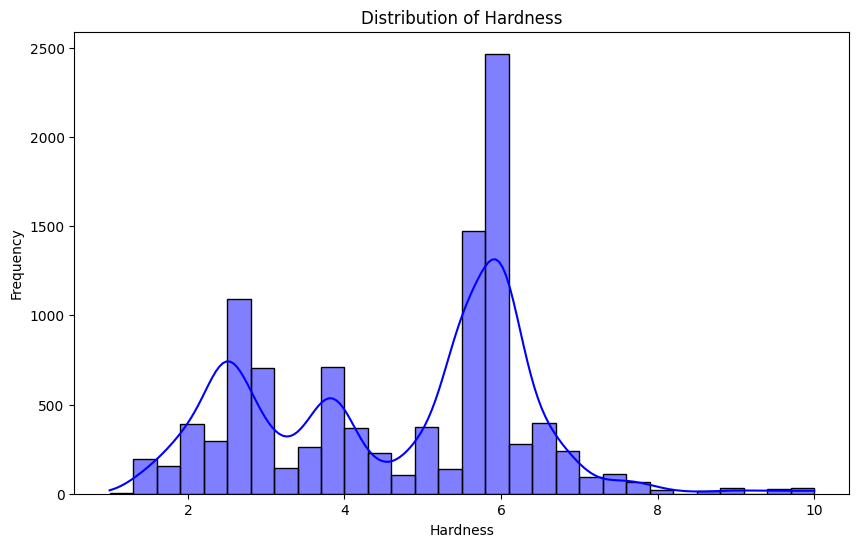

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train['Hardness'], bins=30, kde=True, color='blue')
plt.title('Distribution of Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.show()

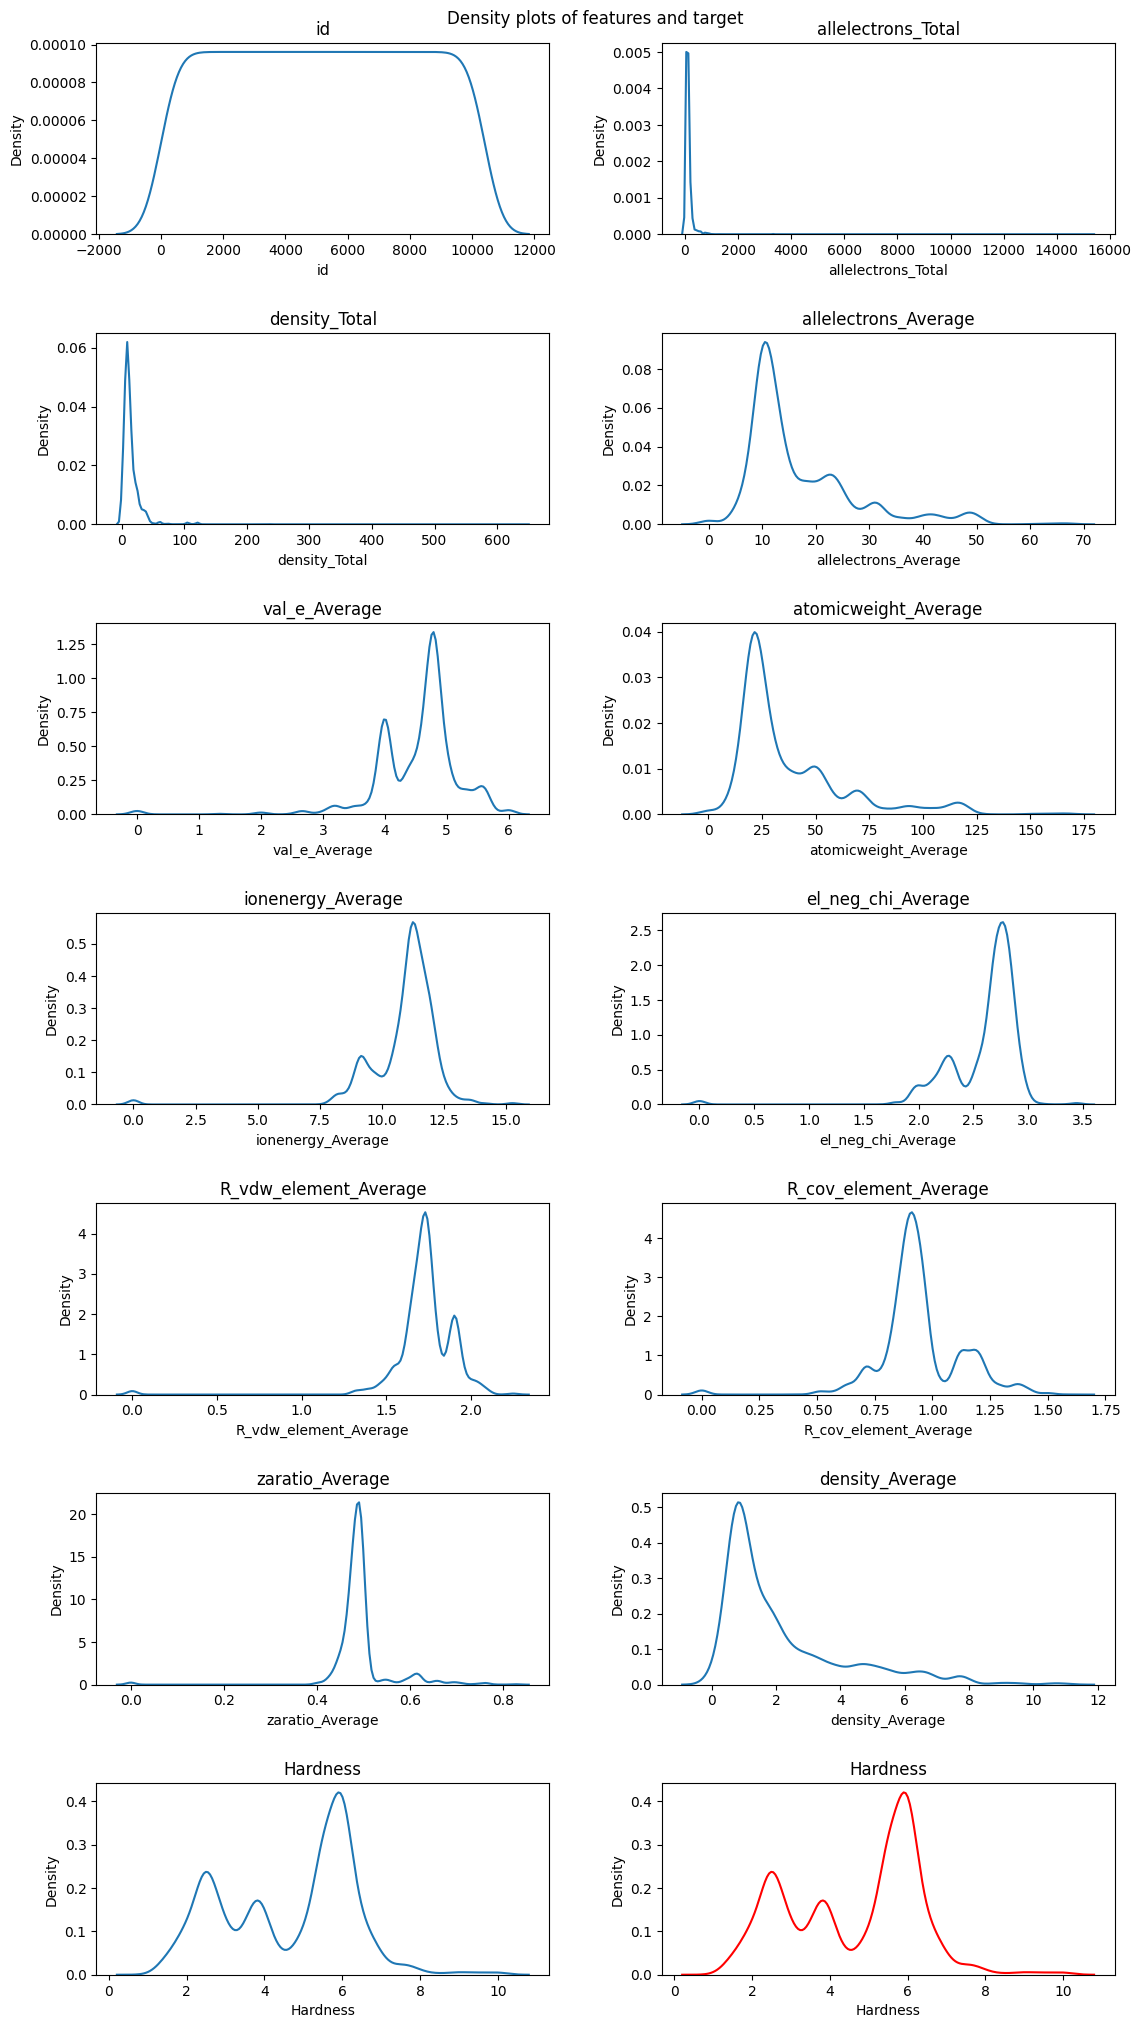

In [14]:
def generate_density_plots(data, title):
    # Calculate the number of rows and columns based on the number of features
    num_features = data.shape[1]
    num_rows = (num_features + 1) // 2  # Add 1 to include the target variable
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
    fig.tight_layout(pad=5.0)
    fig.suptitle(title)

    # Flatten the axes in case num_rows is greater than 1
    axes = axes.flatten()

    # Loop through each feature and the target variable
    for i, ax in enumerate(axes[:-1]):  # Exclude the last subplot for the target variable
        col = data.columns.tolist()[i]
        sns.kdeplot(data=data, ax=ax, x=col)
        ax.set_title(col)

    # Add a density plot for the target variable in the last subplot
    target_col = data.columns.tolist()[-1]
    sns.kdeplot(data=data, ax=axes[-1], x=target_col, color='red')
    axes[-1].set_title(target_col)

# Example usage for your train dataset
generate_density_plots(data=train, title='Density plots of features and target')
plt.show()

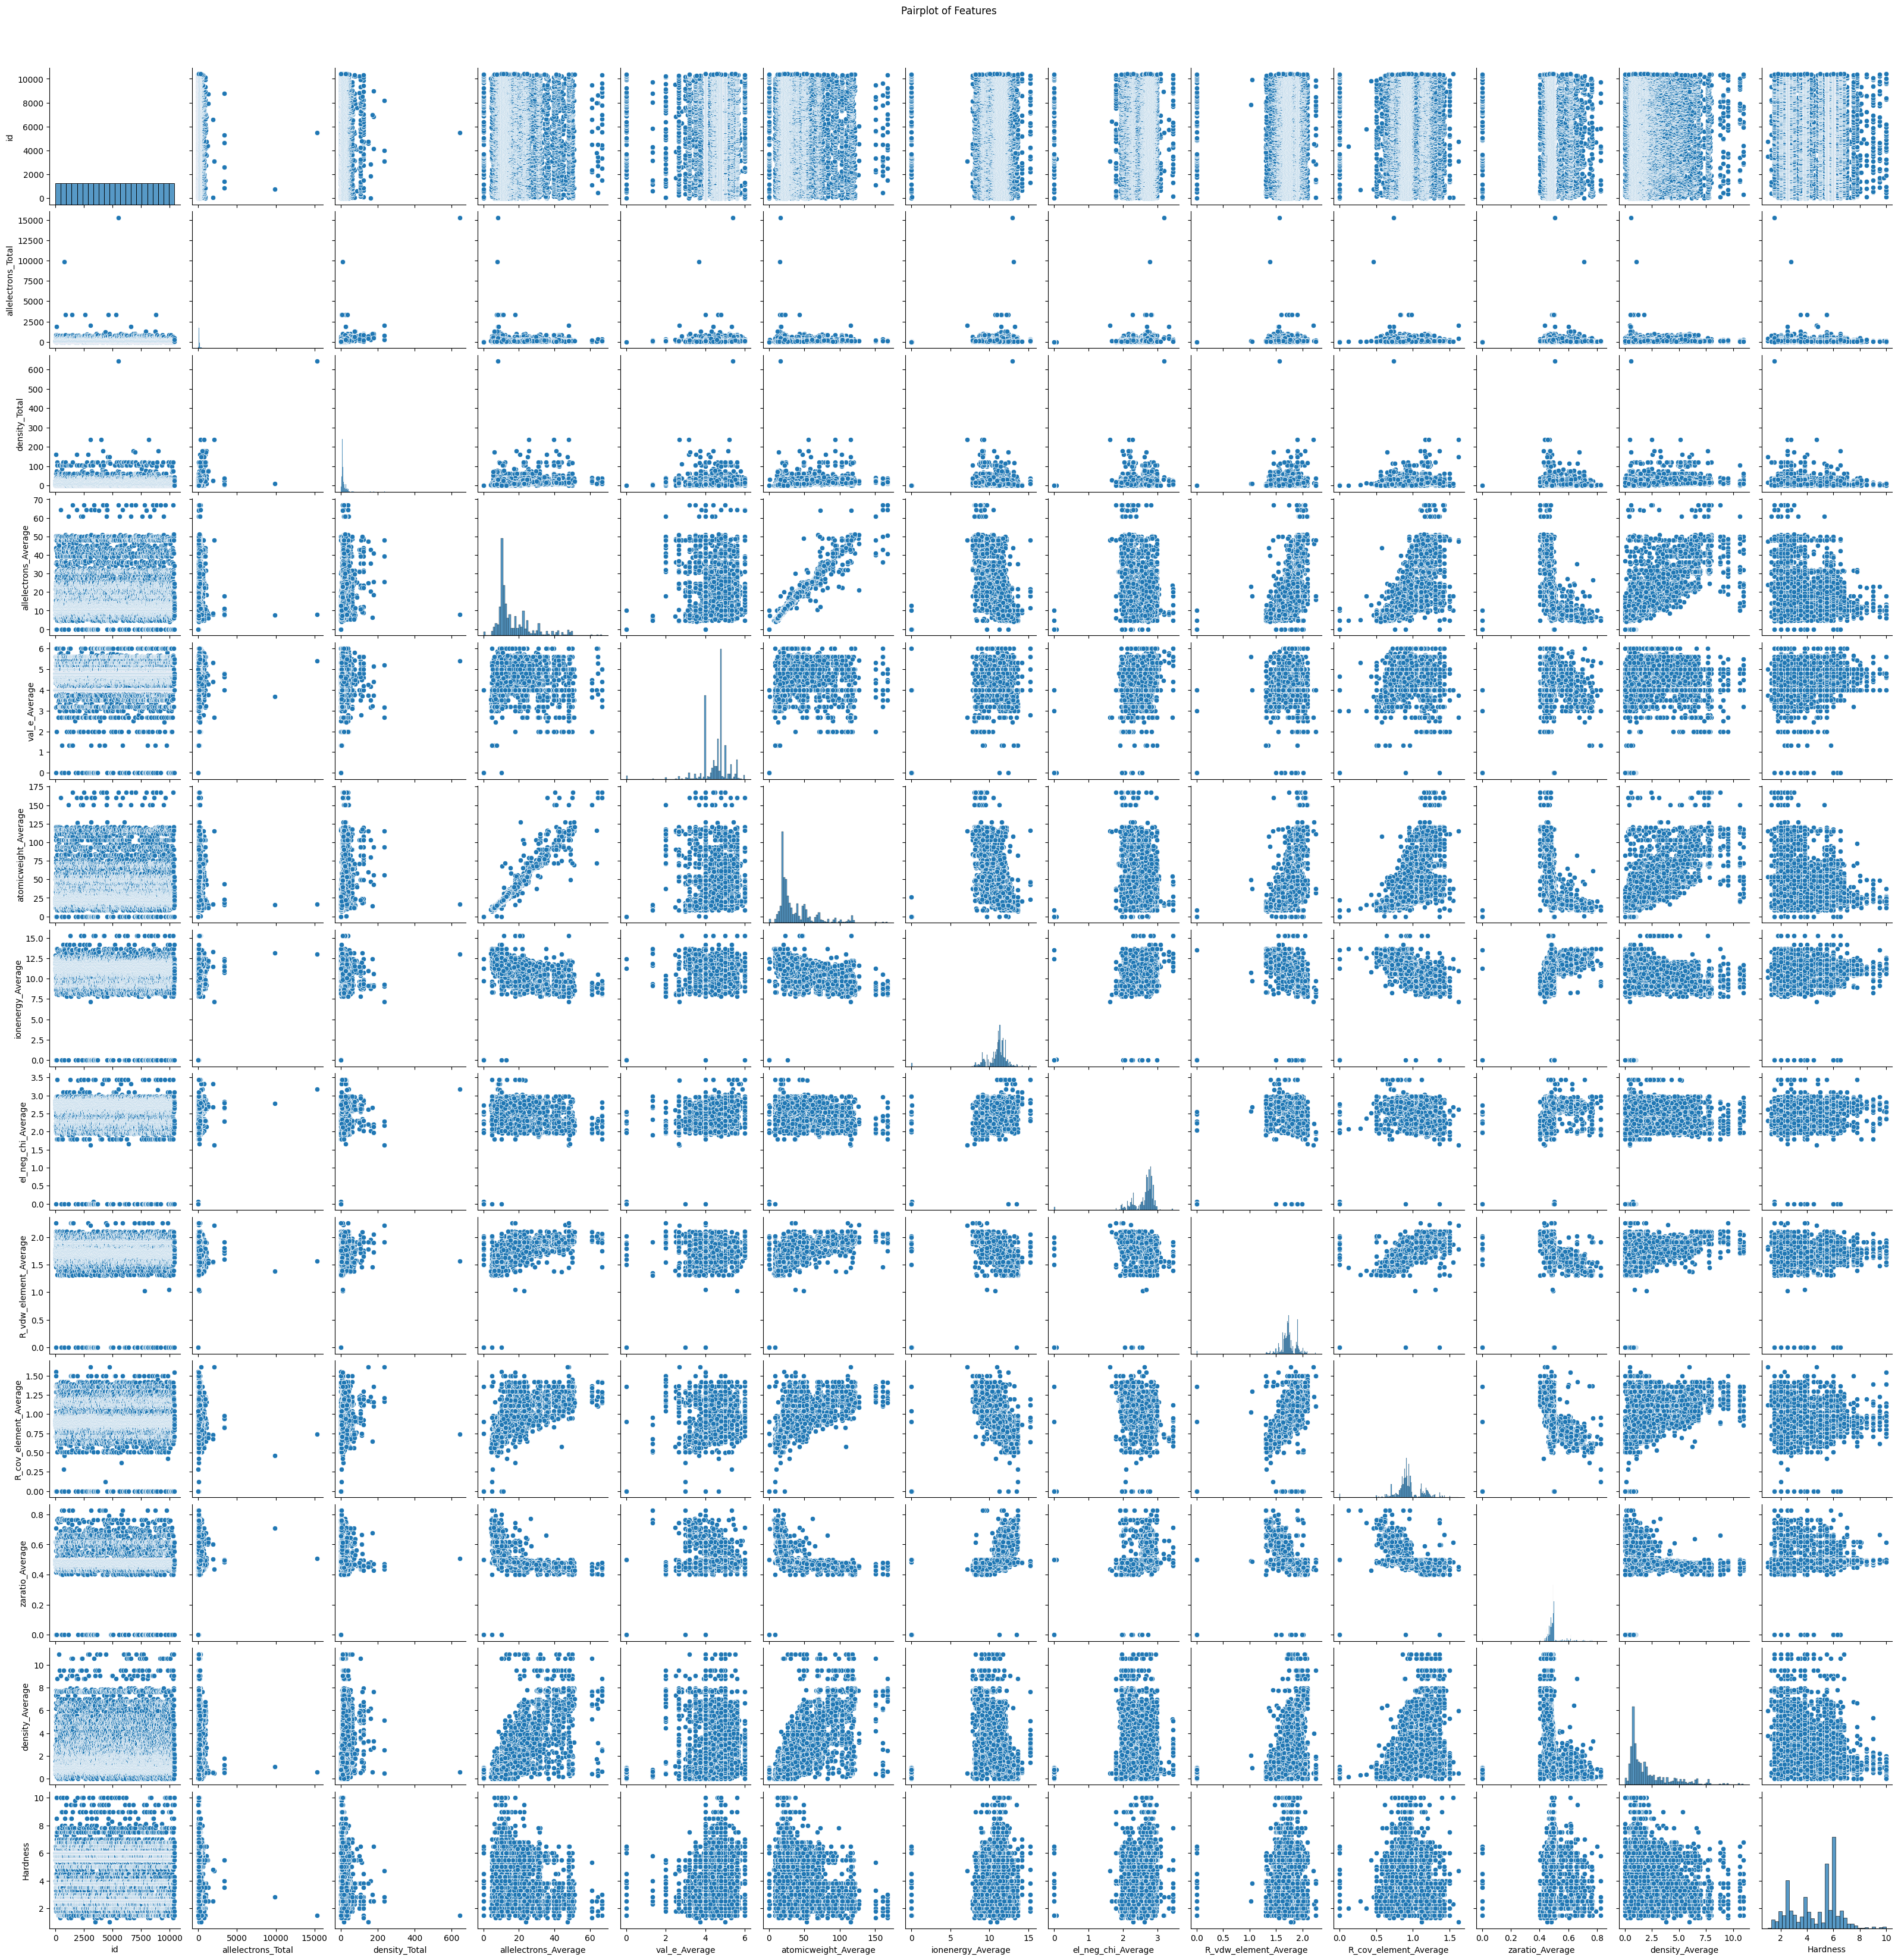

In [15]:
# Pairplot for pairwise relationships
sns.pairplot(train)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

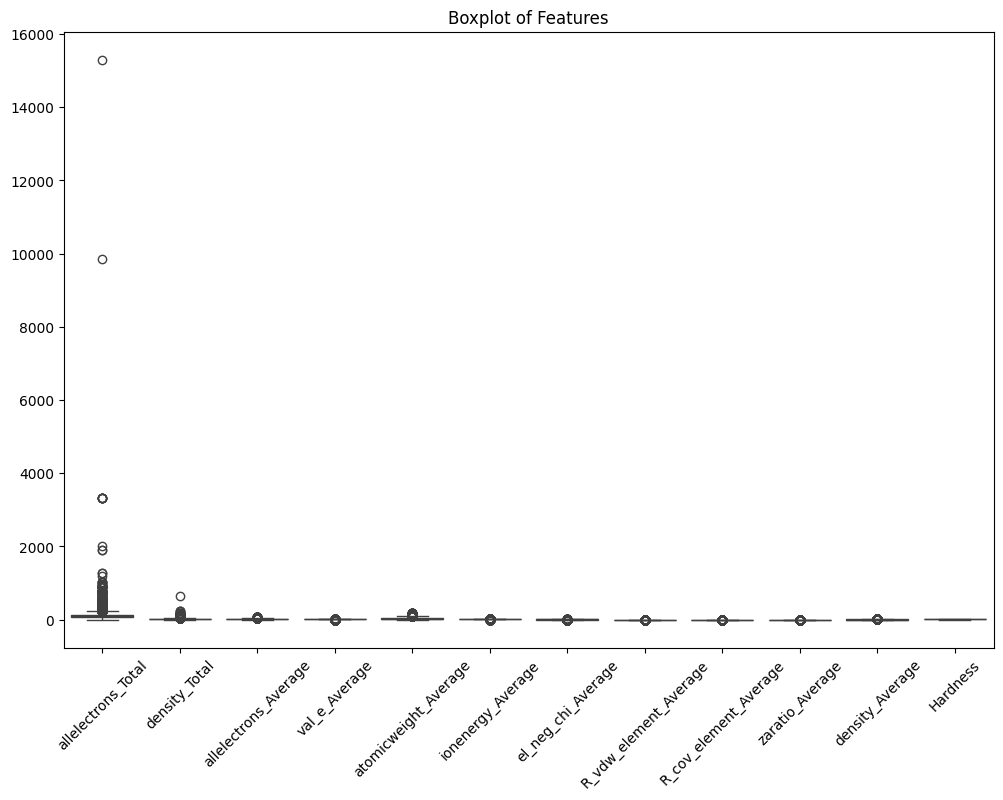

In [16]:
# Boxplot for each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=train.drop('id', axis=1))
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

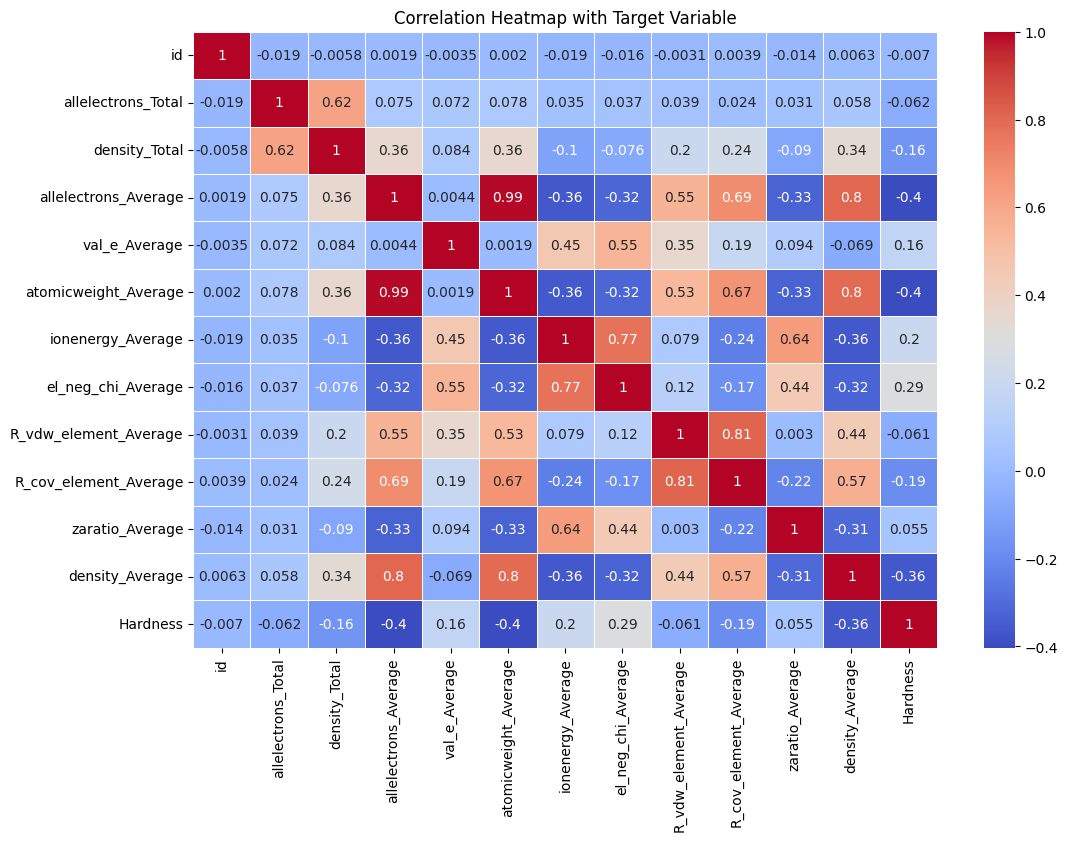

In [17]:
# Correlation matrix heatmap with target variable
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap with Target Variable')
plt.show()

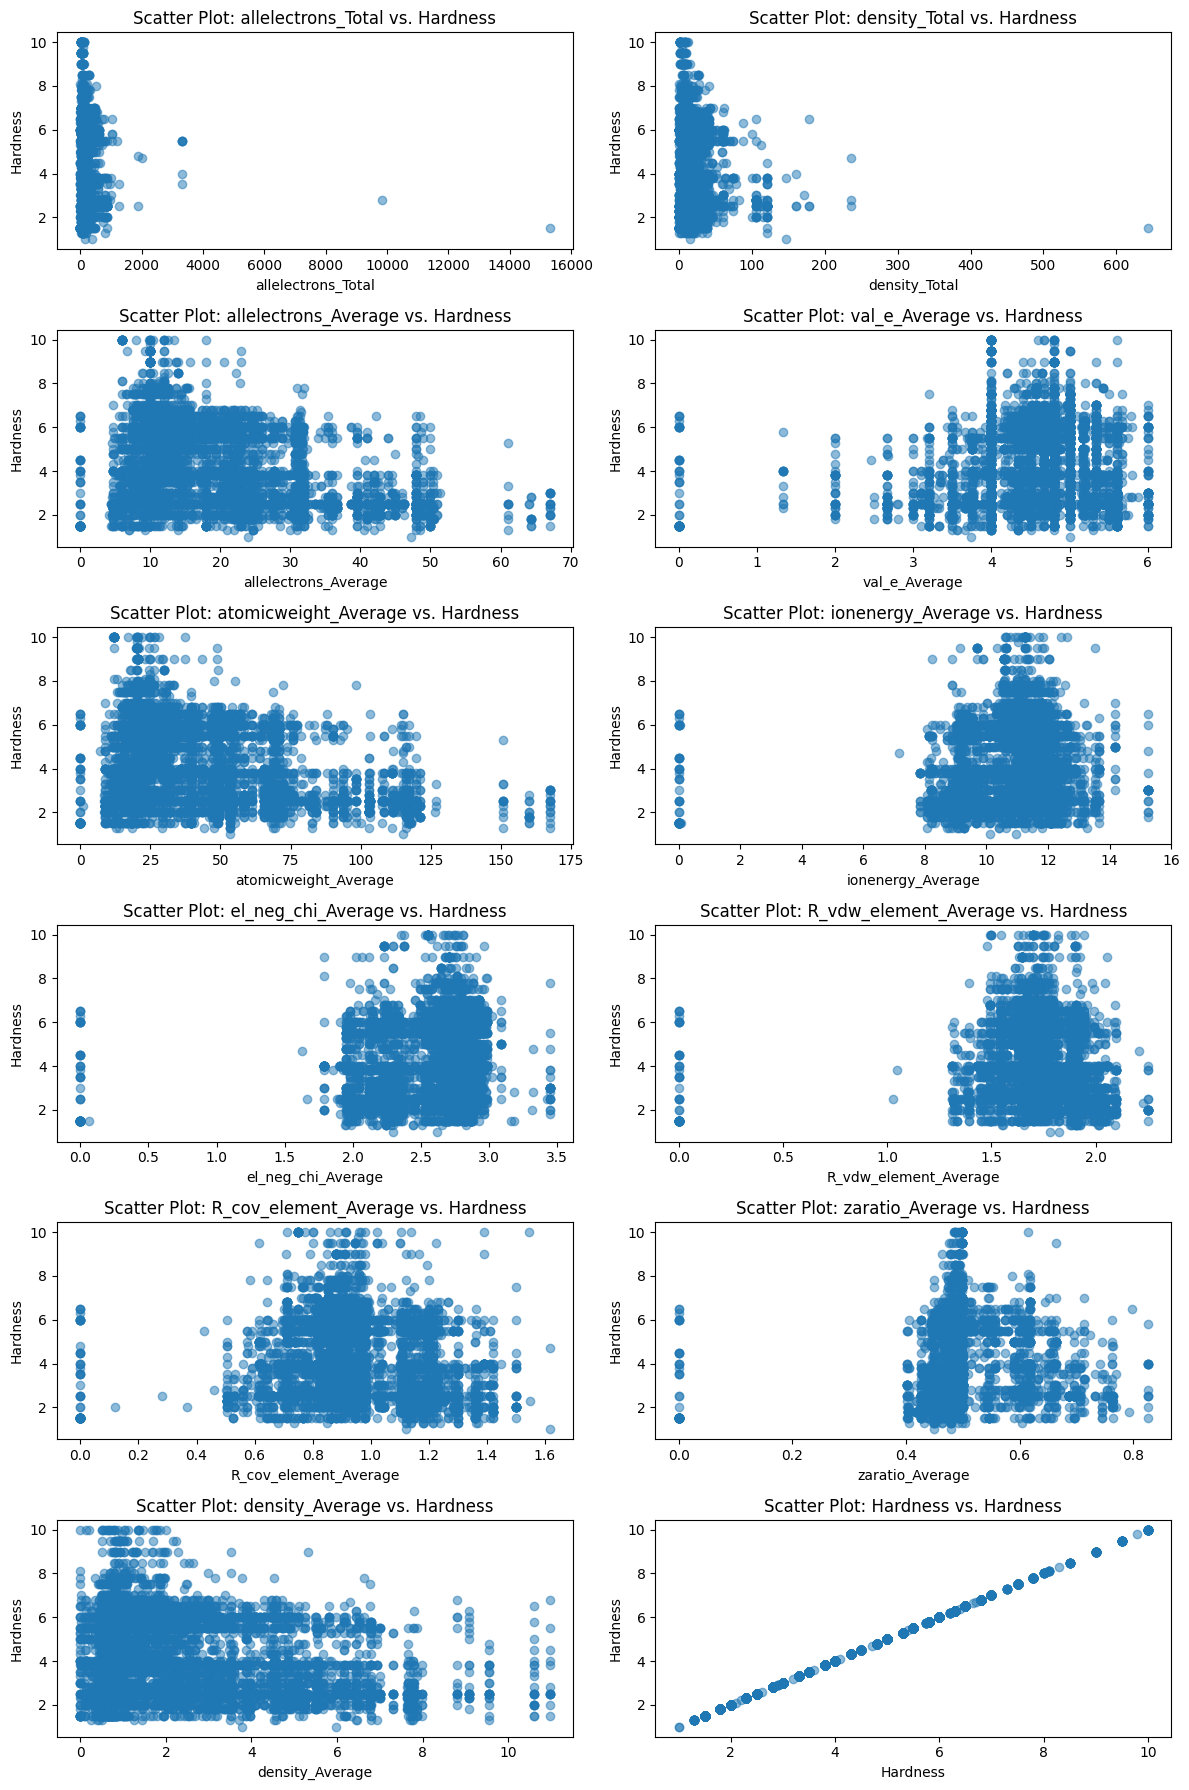

In [18]:
# Scatter plot of the target variable against each feature
num_features = len(train.columns) - 2  # Exclude 'id' and 'Hardness' columns
num_rows = (num_features + 1) // 2  # Add 1 to include the target variable
num_cols = 2

plt.figure(figsize=(12, 3 * num_rows))
for i, col in enumerate(train.columns[1:]):  # Exclude 'id' column
    plt.subplot(num_rows, num_cols, i+1)
    plt.scatter(train[col], train['Hardness'], alpha=0.5)
    plt.title(f'Scatter Plot: {col} vs. Hardness')
    plt.xlabel(col)
    plt.ylabel('Hardness')

plt.tight_layout()
plt.show()

In [19]:
# Bar plot for categorical features (if any)
categorical_cols = train.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    num_cols = min(2, len(categorical_cols))  # Adjust the number of columns based on the number of categorical features
    num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

    plt.figure(figsize=(12, 4 * num_rows))
    for i, col in enumerate(categorical_cols):
        plt.subplot(num_rows, num_cols, i+1)
        sns.countplot(data=train, x=col)
        plt.title(f'Bar Plot: {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical features in the dataset.")

No categorical features in the dataset.


## 3. Data Preprocessing


#### 1. Missing Values:
Check for missing values in the dataset and handle them appropriately. Depending on the extent of missingness, you can either impute missing values or drop the corresponding rows or columns.

In [20]:
# Check for missing values
missing_values = train.isnull().sum()
# Handle missing values based on your strategy

# 2. Feature Scaling:
Scale numerical features if they are on different scales. Common scaling methods include Min-Max scaling or Standardization (z-score normalization).

In [21]:
# Identify numerical features
numerical_features = train.select_dtypes(include=['float64', 'int64']).columns

# Exclude the target variable 'Hardness'
numerical_features = numerical_features.drop('Hardness', errors='ignore')

# Example of Min-Max scaling
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[numerical_features]), columns=numerical_features)
test_scaled = pd.DataFrame(scaler.transform(test[numerical_features]), columns=numerical_features)

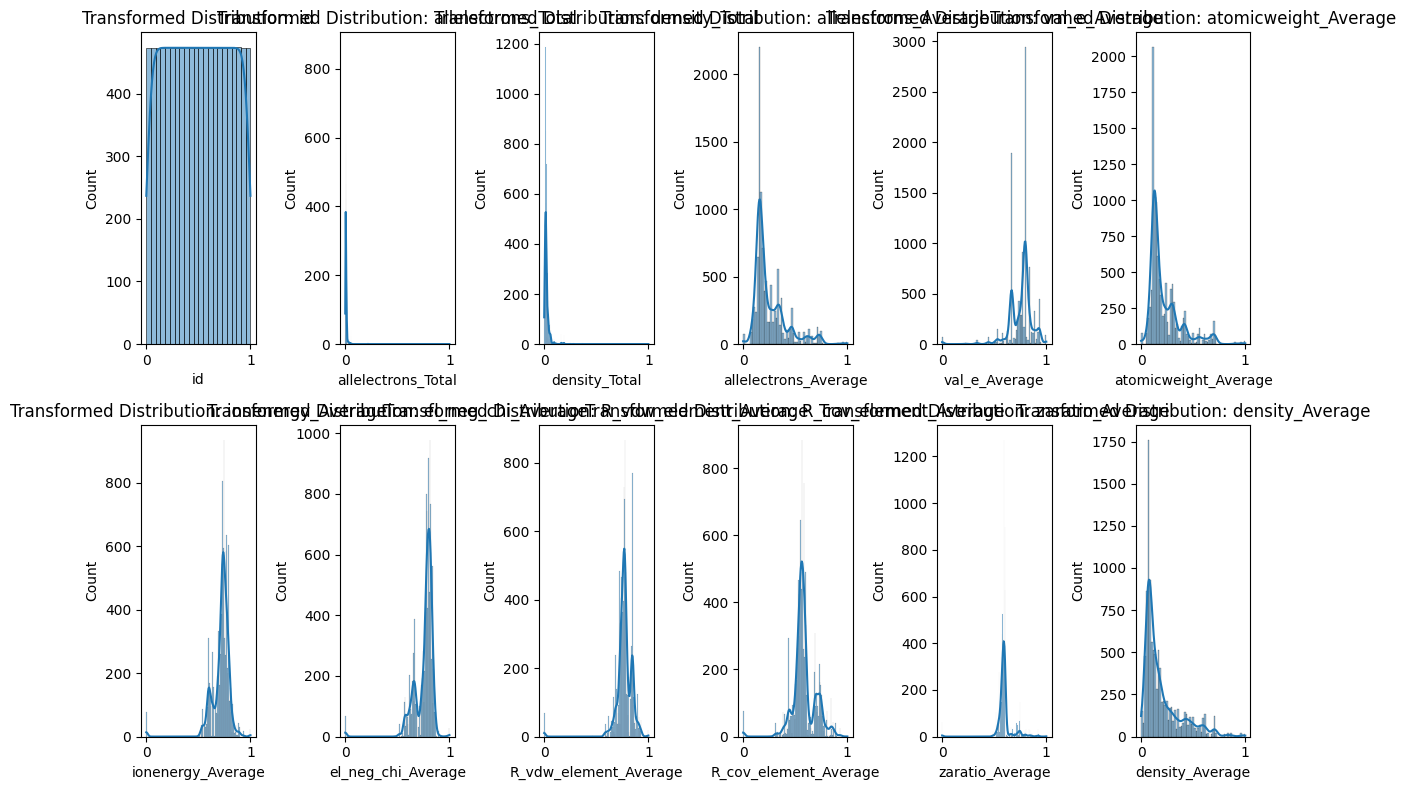

In [22]:
# Visualize the distribution of transformed features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features)//2, i+1)
    sns.histplot(train_scaled[feature], kde=True)
    plt.title(f'Transformed Distribution: {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### Data Transformation:
1. Skewness Correction:

You mentioned that some features are skewed. Consider applying log transformation to right-skewed features and squaring for left-skewed features.

In [23]:
# Identify numerical features for log transformation
numerical_features = train.select_dtypes(include=[np.number]).columns

# Apply log transformation to skewed numerical features
train[numerical_features] = train[numerical_features].apply(lambda x: np.log1p(x) if x.skew() > 0 else np.square(x))

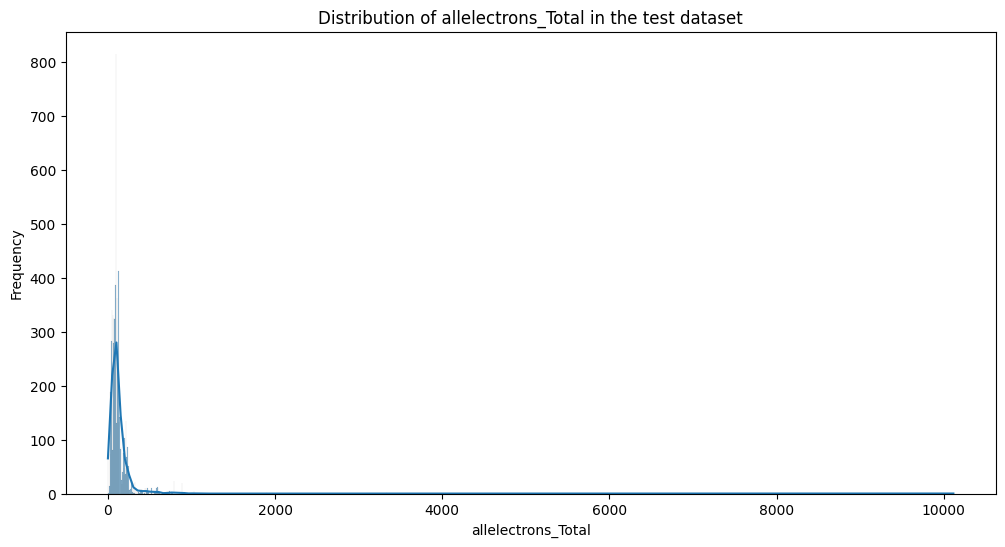

Length of allelectrons_Total in test: 6939
Number of missing values in allelectrons_Total in test: 0




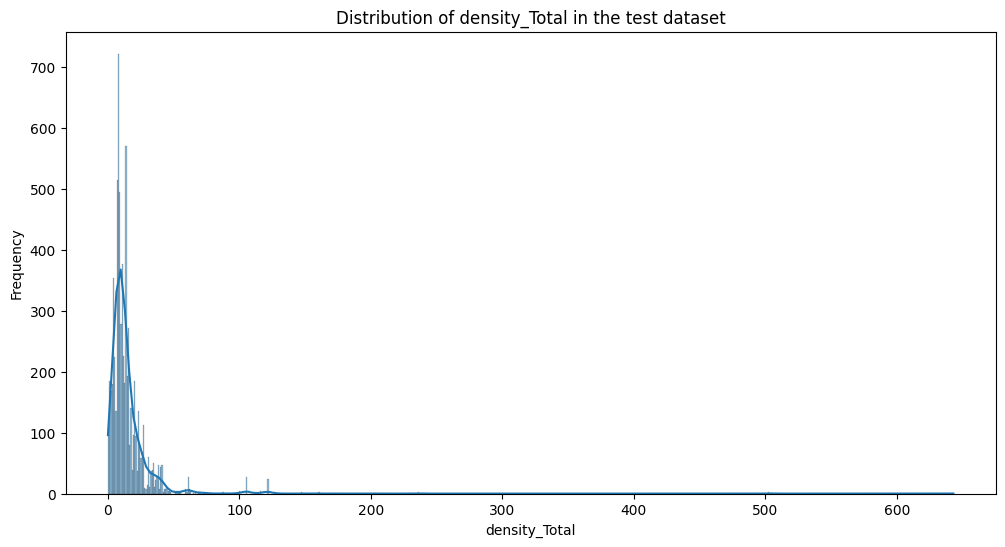

Length of density_Total in test: 6939
Number of missing values in density_Total in test: 0




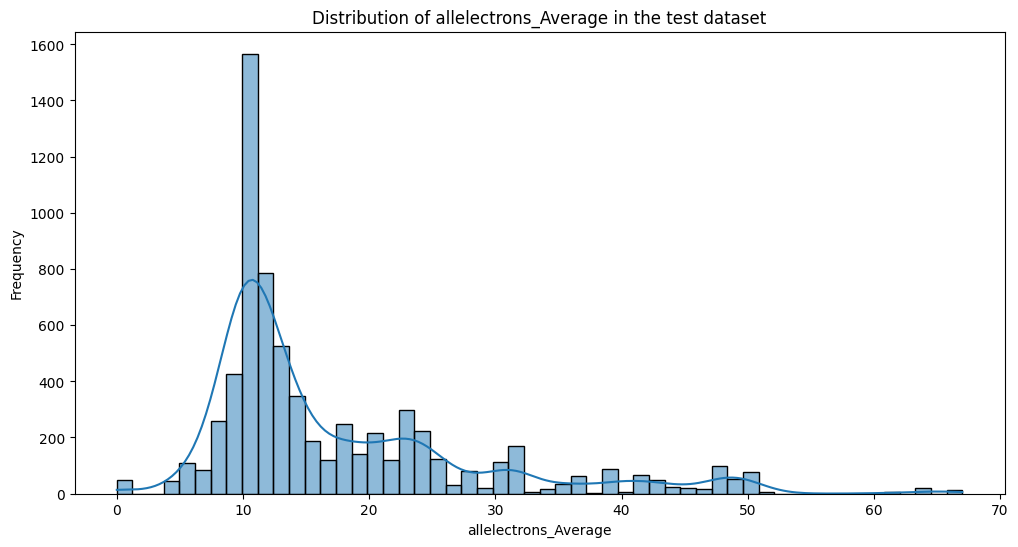

Length of allelectrons_Average in test: 6939
Number of missing values in allelectrons_Average in test: 0




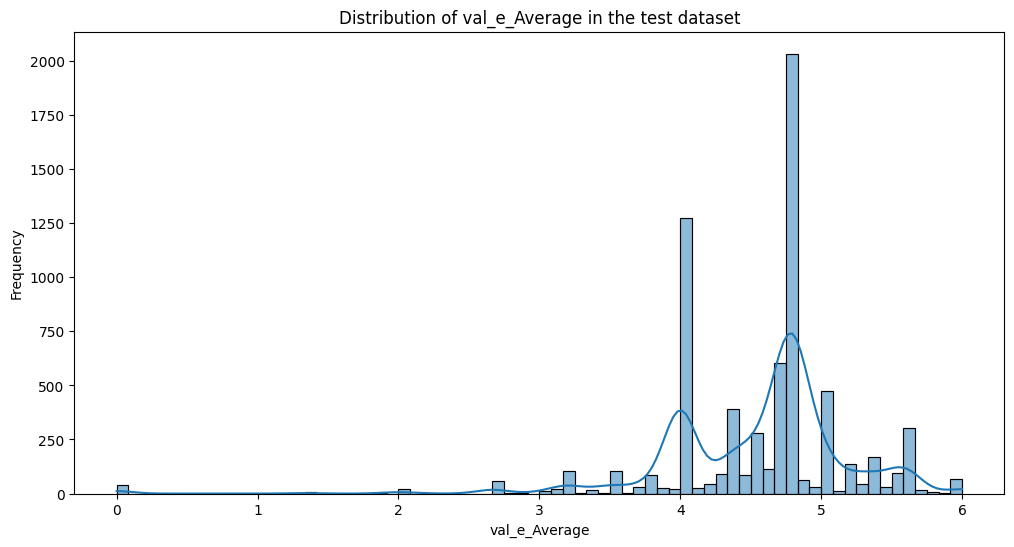

Length of val_e_Average in test: 6939
Number of missing values in val_e_Average in test: 0




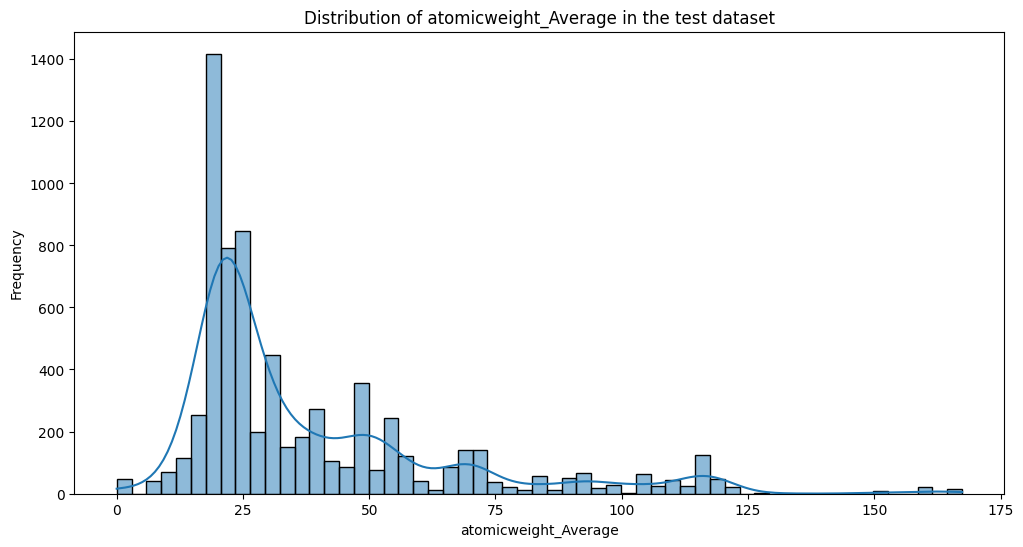

Length of atomicweight_Average in test: 6939
Number of missing values in atomicweight_Average in test: 0




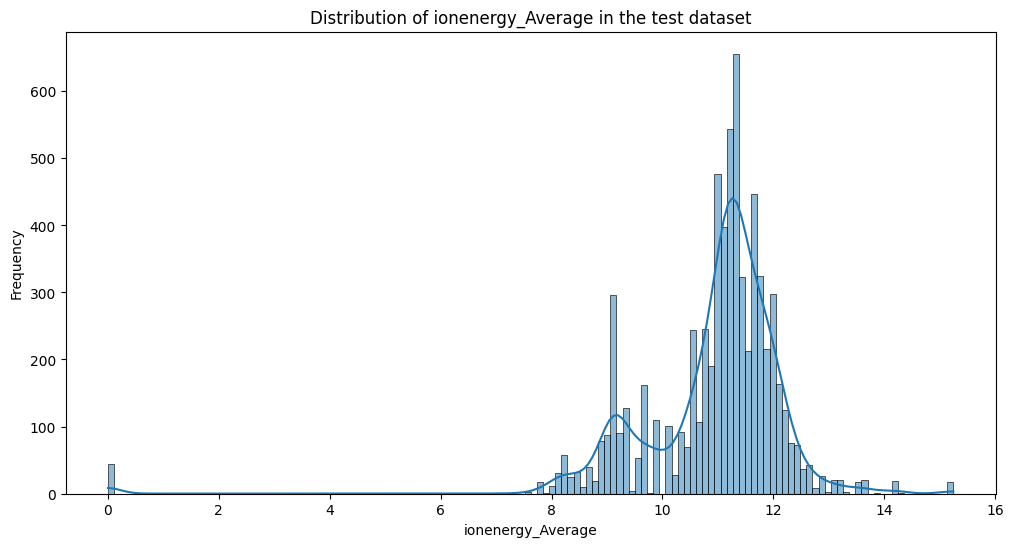

Length of ionenergy_Average in test: 6939
Number of missing values in ionenergy_Average in test: 0




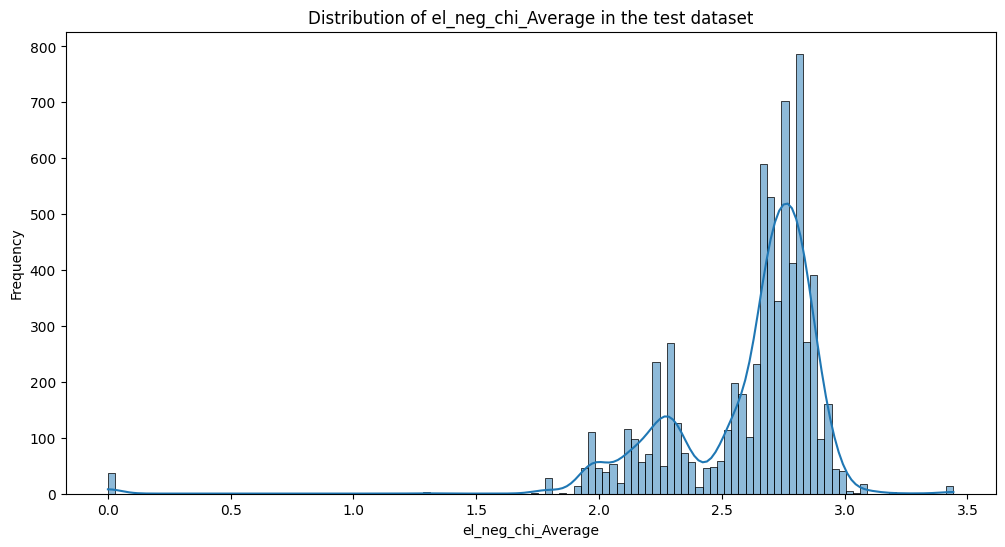

Length of el_neg_chi_Average in test: 6939
Number of missing values in el_neg_chi_Average in test: 0




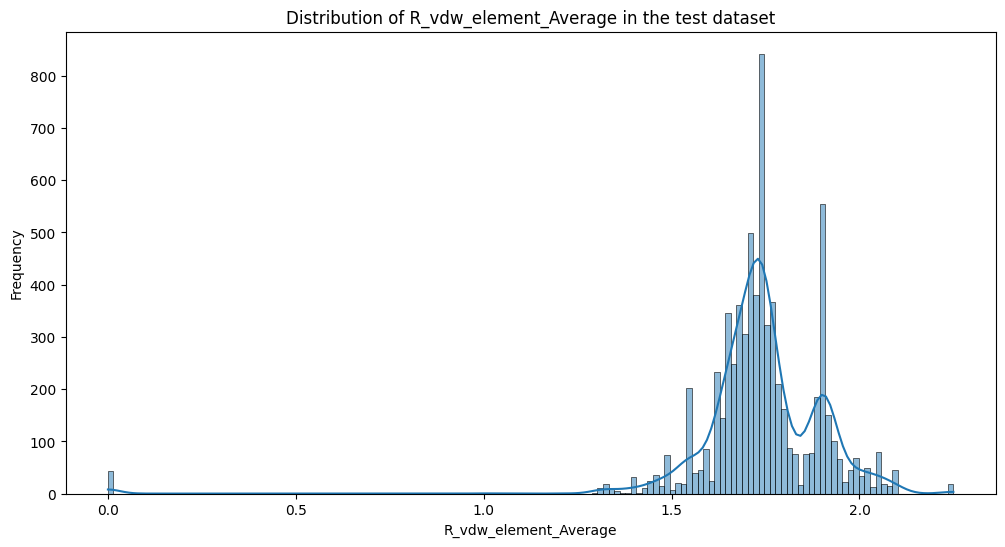

Length of R_vdw_element_Average in test: 6939
Number of missing values in R_vdw_element_Average in test: 0




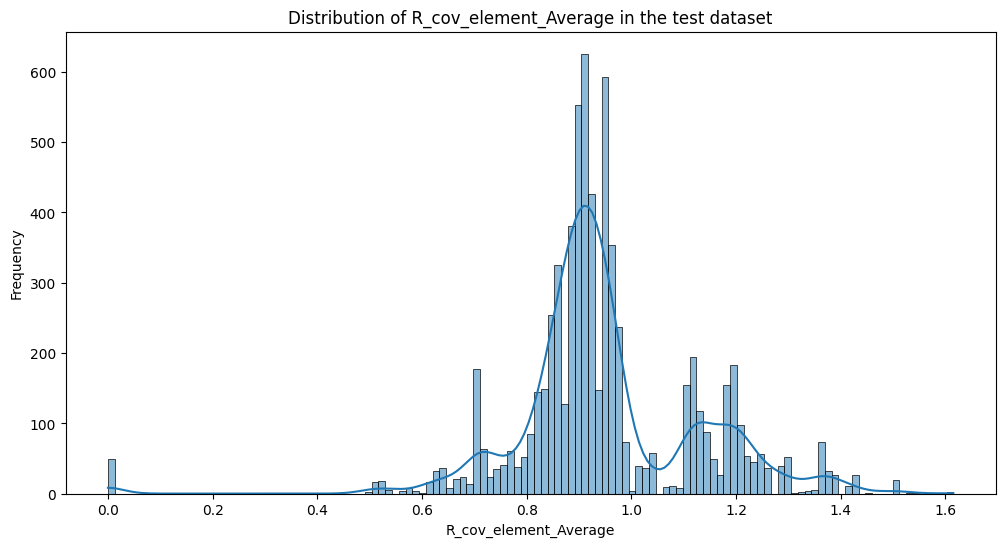

Length of R_cov_element_Average in test: 6939
Number of missing values in R_cov_element_Average in test: 0




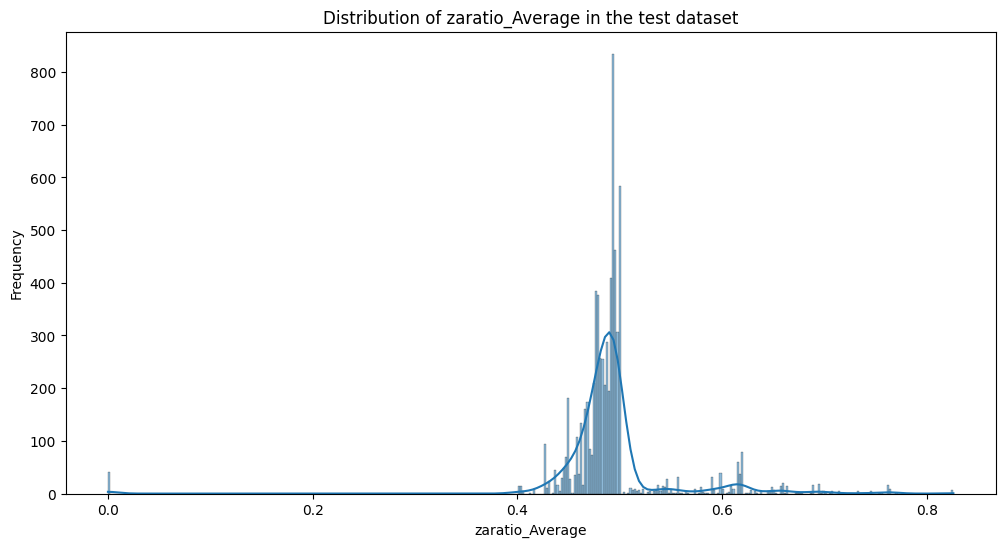

Length of zaratio_Average in test: 6939
Number of missing values in zaratio_Average in test: 0




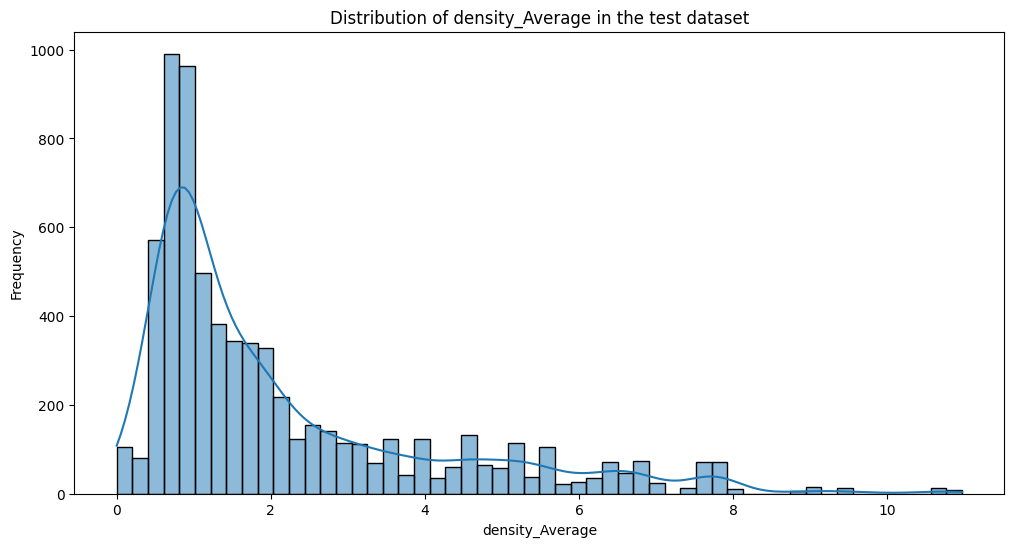

Length of density_Average in test: 6939
Number of missing values in density_Average in test: 0




In [24]:
# Display the distribution of each feature
for col in test.columns[1:]:
    plt.figure(figsize=(12, 6))
    
    # Plot a histogram for numerical features
    if test[col].dtype != 'object':
        sns.histplot(test[col], kde=True)
        plt.title(f'Distribution of {col} in the test dataset')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        # Plot a count plot for categorical features
        sns.countplot(x=col, data=test)
        plt.title(f'Count of {col} in the test dataset')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    
    # Print length and missing values information
    print(f'Length of {col} in test:', len(test[col]))
    print(f'Number of missing values in {col} in test:', test[col].isnull().sum())
    print('\n' + '='*50 + '\n')

1. Scaling:

It seems there was an issue with the scaling part. Ensure that you have defined numerical_features before using it in the Min-Max scaling code.

In [25]:
# Replace 'feature1', 'feature2', ... with actual column names of numerical features
numerical_features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average', 'val_e_Average', 
                      'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 
                      'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average']

scaler = MinMaxScaler()

In [26]:
# Scale the numerical features in the training dataset
train_scaled = pd.DataFrame(scaler.fit_transform(train[numerical_features]), columns=numerical_features)

In [27]:
# Scale the numerical features in the test dataset
test_scaled = pd.DataFrame(scaler.transform(test[numerical_features]), columns=numerical_features)

In [28]:
# Display the first few rows of the scaled training dataset
print("Scaled Training Dataset:")
print(train_scaled.head())

# Display the first few rows of the scaled test dataset
print("\nScaled Test Dataset:")
print(test_scaled.head())

Scaled Training Dataset:
   allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0             0.47896        0.09441               0.56829        0.64000   
1             0.47896        0.33194               0.56829        0.64000   
2             0.45080        0.35423               0.66581        0.87111   
3             0.47896        0.35281               0.56829        0.64000   
4             0.49422        0.36469               0.60047        0.64000   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0               0.59951            0.52895             0.64540   
1               0.59665            0.62375             0.64028   
2               0.69209            0.62847             0.67466   
3               0.59587            0.51571             0.59151   
4               0.63547            0.60154             0.64540   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                0.59256                0.28327

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')


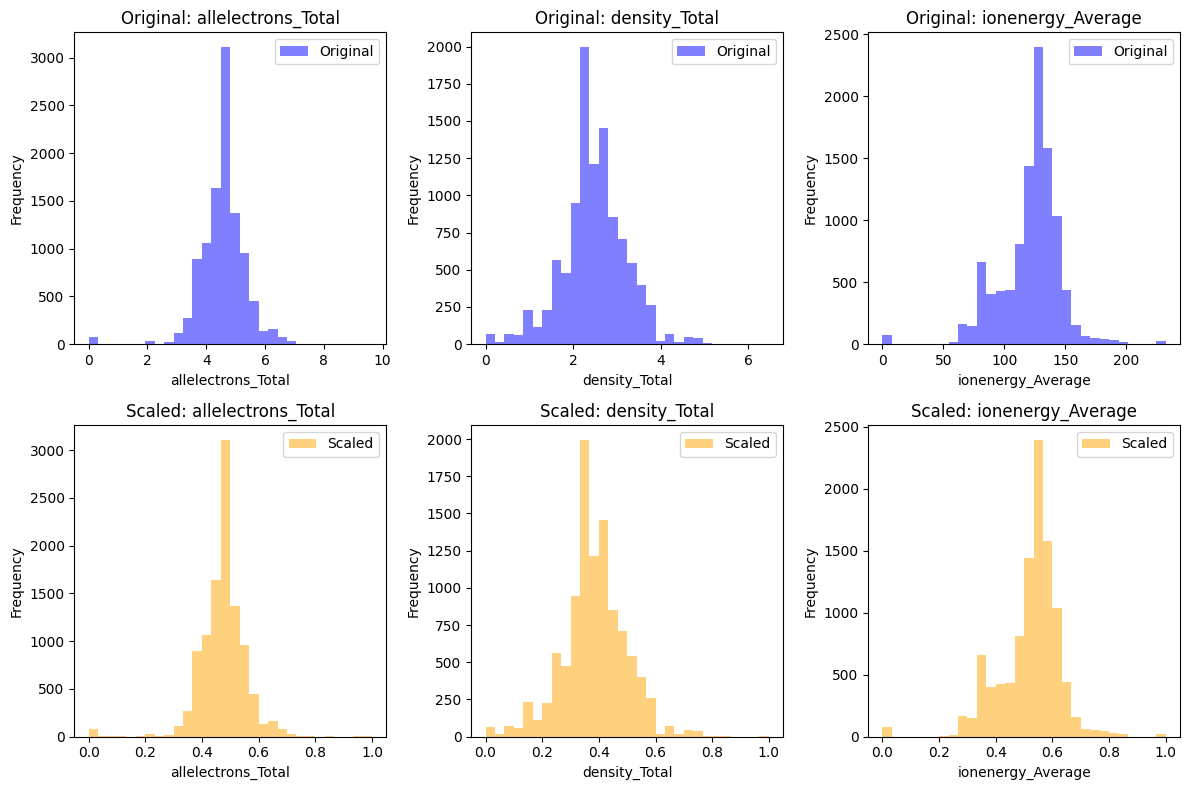

In [29]:
# Print the column names
print(train.columns)

# Replace 'feature1', 'feature2', 'feature3' with actual column names
selected_features = ['allelectrons_Total', 'density_Total', 'ionenergy_Average']

# The rest of the visualization code remains the same
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, len(selected_features), i + 1)
    plt.hist(train[feature], bins=30, color='blue', alpha=0.5, label='Original')
    plt.title(f'Original: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(2, len(selected_features), i + 1 + len(selected_features))
    plt.hist(train_scaled[feature], bins=30, color='orange', alpha=0.5, label='Scaled')
    plt.title(f'Scaled: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# 4. Feature Engineering:
Create new features that might be informative for the prediction task. For example, you can derive features from existing ones or use domain knowledge to generate meaningful features.

### Data Exploration and Visualization:
4.1 Density Plots:

You can create density plots for the numerical features in your training dataset using the generate_density_plots function you shared earlier. Make sure to adjust the code to match the column names in your dataset.

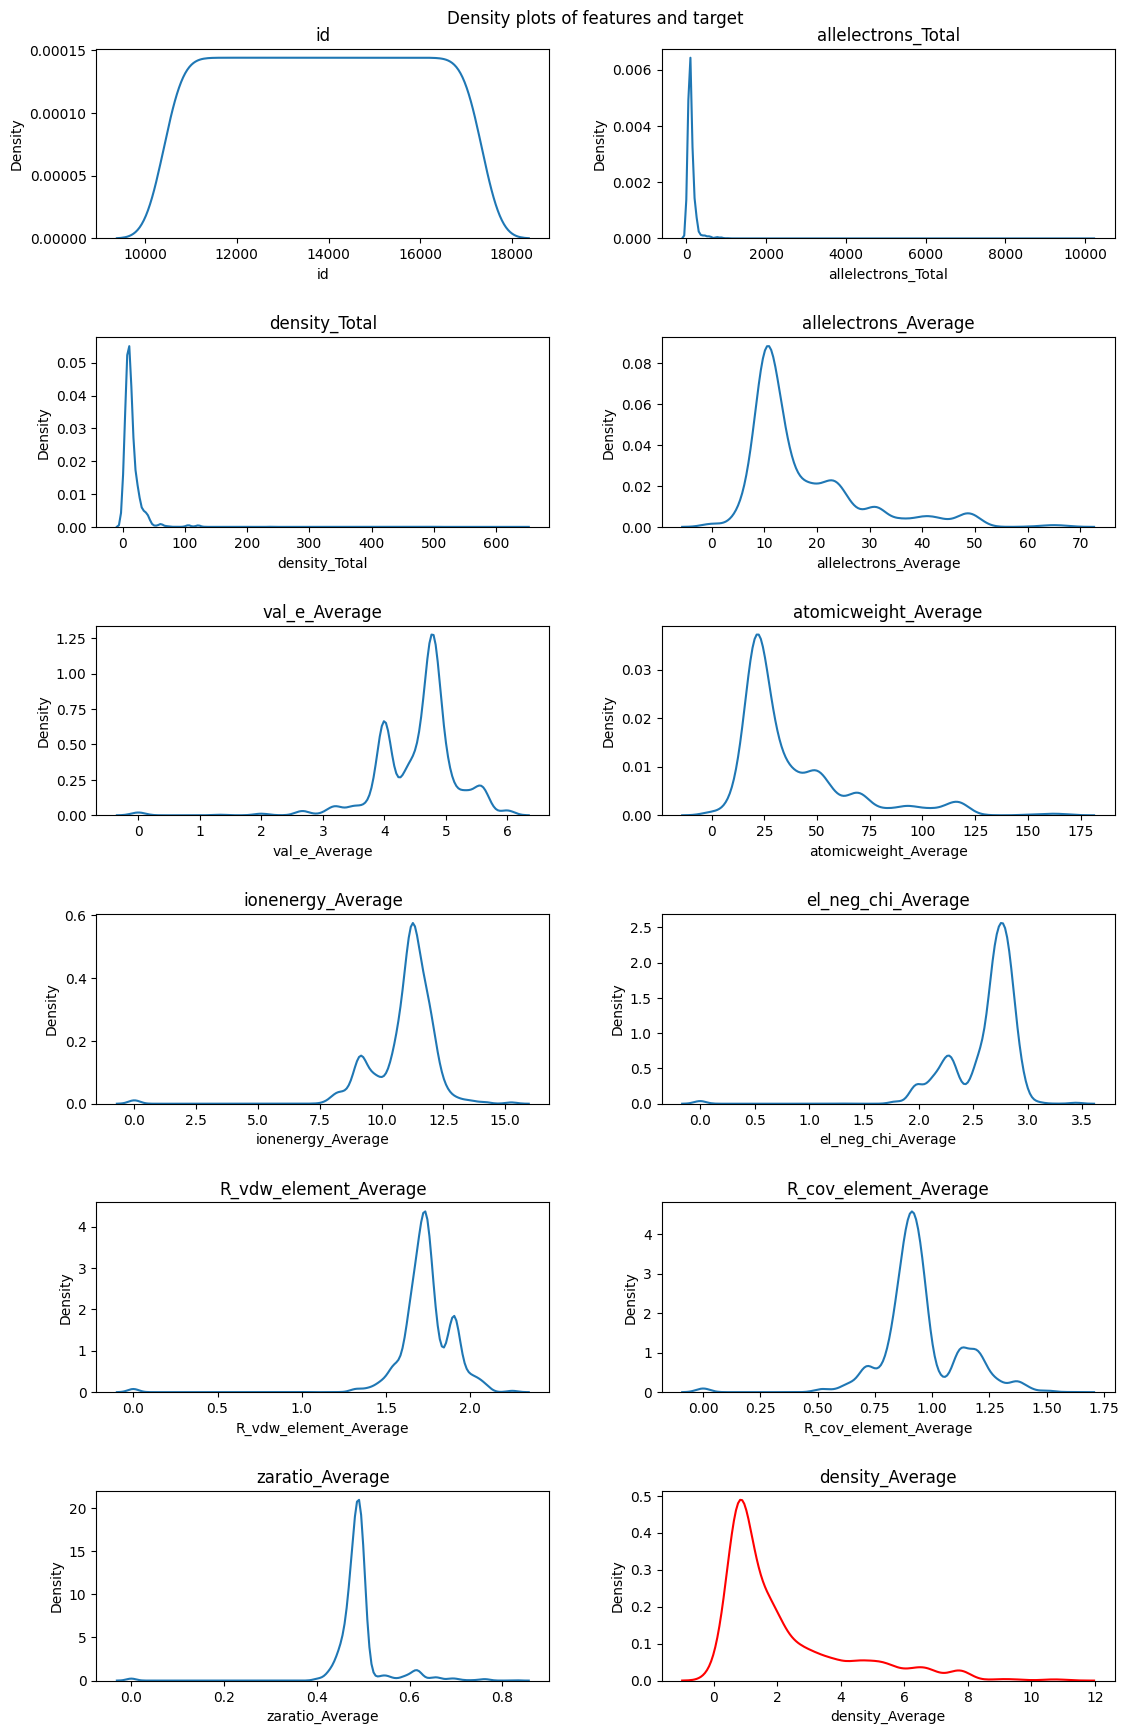

In [30]:
generate_density_plots(data=test, title='Density plots of features and target')

#### 4.2 Outlier Detection and Handling:
Identify and handle outliers in the data. You can use visualization techniques or statistical methods to detect outliers and decide whether to remove or transform them.

In [31]:
# Define the numerical features
numerical_features = ['allelectrons_Total', 'density_Total', 'ionenergy_Average']

# Calculate z-scores
z_scores = zscore(train[numerical_features])

# Create a boolean mask for outliers (values with z-score greater than 3)
outlier_mask = (z_scores < 3).all(axis=1)

# Create a new DataFrame without outliers
train_no_outliers = train[outlier_mask]

# Print or visualize the results
print("Original Shape:", train.shape)
print("Shape after removing outliers:", train_no_outliers.shape)

# You can also display the rows with outliers if needed
outliers = train[~outlier_mask]
print("Outliers:")
print(outliers)

Original Shape: (10407, 13)
Shape after removing outliers: (10254, 13)
Outliers:
              id  allelectrons_Total  density_Total  allelectrons_Average  \
21           441             6.78559        5.08317               3.59778   
65          4225             7.54697        3.25894               2.19103   
119        14161             6.78559        4.80746               3.59347   
138        19044             6.67330        4.66828               3.70130   
329       108241             6.67330        4.66828               3.70130   
...          ...                 ...            ...                   ...   
10018  100360324             5.31321        3.17022               3.05400   
10102  102050404             6.78559        4.80746               3.59347   
10295  105987025             4.67283        2.44296               3.06805   
10305  106193025             5.35186        4.80746               3.59347   
10403  108222409             3.43399        1.00911               2.3979

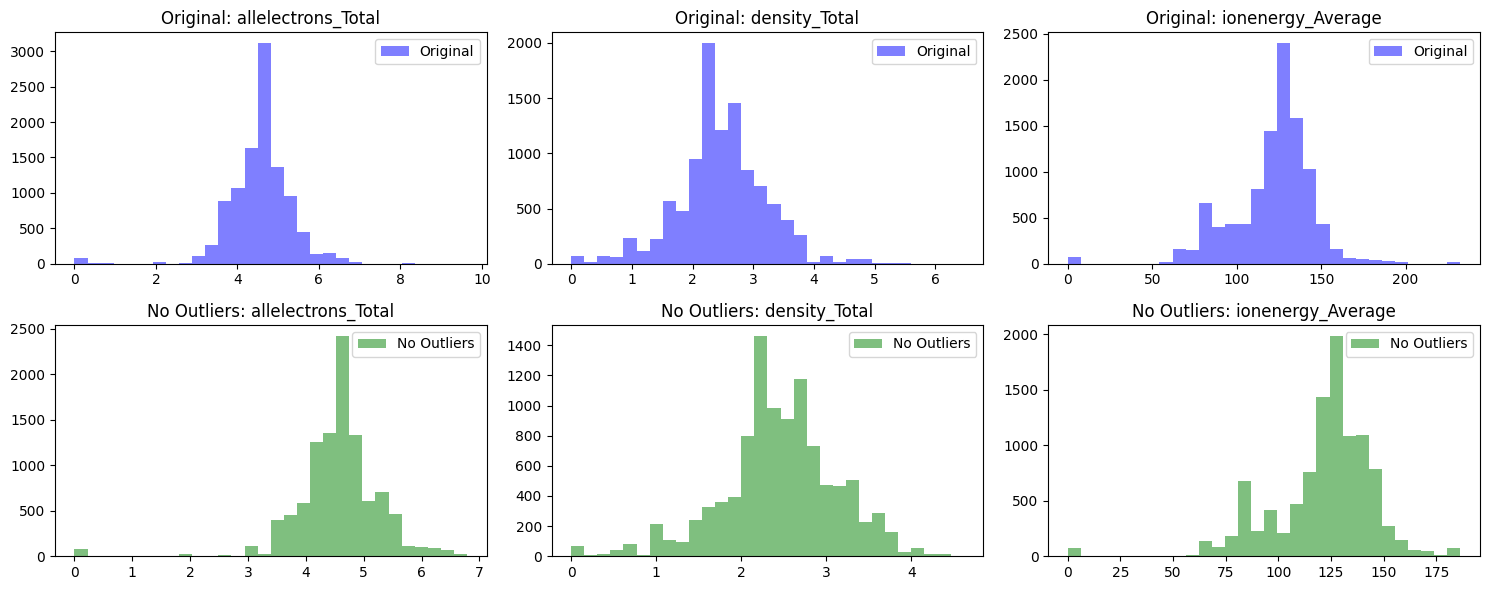

In [32]:
# Visualize the distribution of each numerical feature before and after removing outliers
plt.figure(figsize=(15, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features), i + 1)
    plt.hist(train[feature], bins=30, color='blue', alpha=0.5, label='Original')
    plt.title(f'Original: {feature}')
    plt.legend()

    plt.subplot(2, len(numerical_features), i + len(numerical_features) + 1)
    plt.hist(train_no_outliers[feature], bins=30, color='green', alpha=0.5, label='No Outliers')
    plt.title(f'No Outliers: {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

#### 4.3 Advanced Feature Analysis:
Explore relationships between features using advanced techniques like PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) for dimensionality reduction.

In [33]:
# Example of PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train[numerical_features])

In [34]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.99825643 0.00154358]


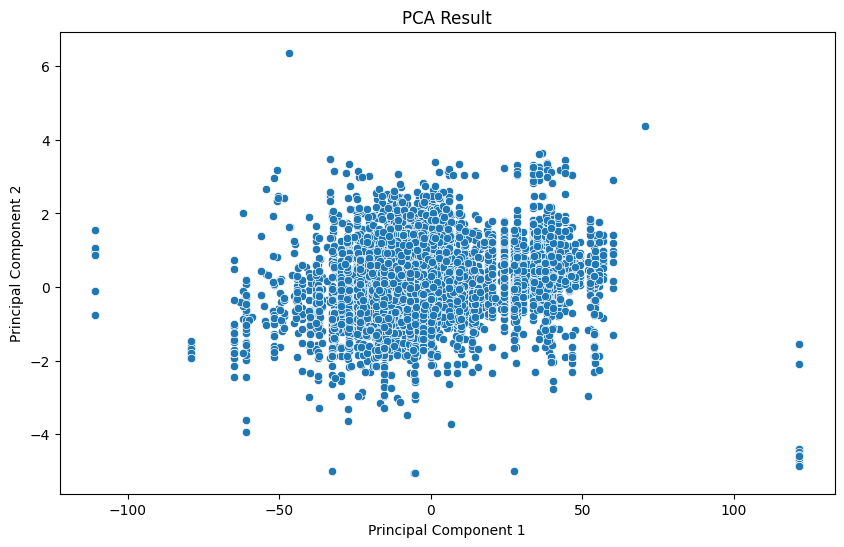

In [35]:
# Scatter plot of the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 5. Modeling

In [36]:
# First, identify independent variables (X) and the dependent variable (y)
X = train[numerical_features].values
y = train['Hardness'].values

In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Choose a model (e.g., a simple linear regression model)
model = LinearRegression()

In [39]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Make predictions on the training set
train_predictions = model.predict(X_train)

In [41]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

In [42]:
# Evaluate the model's performance
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

Training RMSE: 15.38778690173805
Test RMSE: 14.81396104307172
R^2 Score: 0.030257195213989507


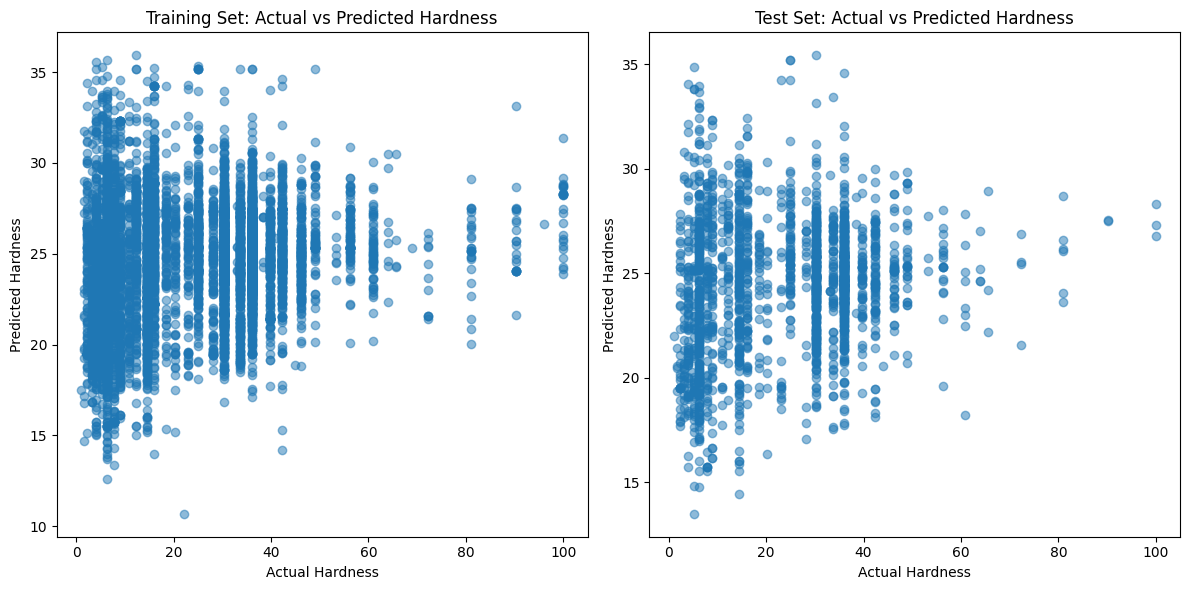

In [43]:
# Scatter plot for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.title('Training Set: Actual vs Predicted Hardness')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title('Test Set: Actual vs Predicted Hardness')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')

plt.tight_layout()
plt.show()

# Model Performance Metrics:

## R-Squared (R2) Value:
R-Squared measures the explanatory power of the model. The closer it is to 1, the better the model explains the data. R-Squared is calculated as follows:

\[ R^2 = 1 - \frac{\text{MSE}}{\text{Var}(y)} \]

- \(R^2\): R-Squared value
- \(\text{MSE}\): Mean Squared Error
- \(\text{Var}(y)\): Variance of the actual values

## Mean Absolute Error (MAE):
MAE measures how far the model's predictions are from the actual values. It is calculated by taking the average of the absolute differences between each prediction and its corresponding actual value:

\[ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \]

- \(n\): Number of observations
- \(y_i\): Actual value
- \(\hat{y}_i\): Model's prediction

## Mean Squared Error (MSE):
MSE calculates the average of the squared differences between predictions and actual values. MSE emphasizes larger errors, as it squares the differences. The formula is as follows:

\[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

- \(n\): Number of observations
- \(y_i\): Actual value
- \(\hat{y}_i\): Model's prediction

These metrics are used to evaluate the performance of the model and understand how close the predictions are to the actual values.

In [44]:
# Train set performance
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)

In [45]:
# Test set performance
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [46]:
print(f'Train R2: {train_r2:.4f}, MAE: {train_mae:.4f}, MSE: {train_mse:.4f}')
print(f'Test R2: {test_r2:.4f}, MAE: {test_mae:.4f}, MSE: {test_mse:.4f}')

Train R2: 0.0394, MAE: 12.9016, MSE: 236.7840
Test R2: 0.0303, MAE: 12.7000, MSE: 219.4534


# Model Hyperparameter Tuning:
- You can improve the performance of the model by adjusting its hyperparameters using techniques such as Grid Search or Random Search.
- For example, using GridSearchCV:

### Assuming you have X_train and y_train as your features and target variable

In [47]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [48]:
# Display the cross-validation scores
print("Cross-validation Scores (negative mean squared error):", cv_scores)

Cross-validation Scores (negative mean squared error): [-214.08808939 -258.53350372 -246.56738888 -216.79821938 -249.92110254]


In [49]:
# Calculate the mean of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-validation Score:", mean_cv_score)

Mean Cross-validation Score: -237.18166078529626


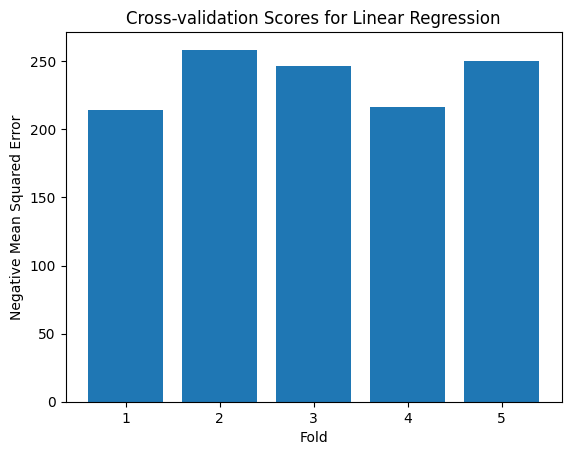

In [50]:
# Visualize cross-validation scores
plt.bar(range(1, len(cv_scores) + 1), -cv_scores)
plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-validation Scores for Linear Regression')
plt.show()

### 5.1 Baseline RandomForest Model

In [51]:
rf_model = RandomForestRegressor(random_state=42)
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5)
rf_mse = mean_squared_error(y_train, rf_preds)
print(f'RandomForest Mean Squared Error: {rf_mse}')

RandomForest Mean Squared Error: 174.46564543909415


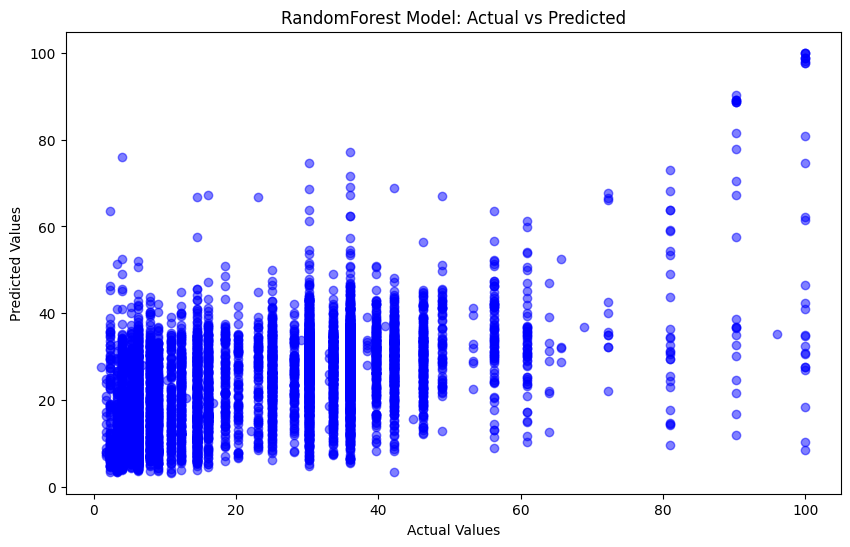

In [52]:
# Scatter plot for RandomForest predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_preds, color='blue', alpha=0.5)
plt.title('RandomForest Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 5.2 Baseline CatBoost Model


In [53]:
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_preds = cross_val_predict(catboost_model, X_train, y_train, cv=5)
catboost_mse = mean_squared_error(y_train, catboost_preds)
print(f'CatBoost Mean Squared Error: {catboost_mse}')

CatBoost Mean Squared Error: 160.00326742325356


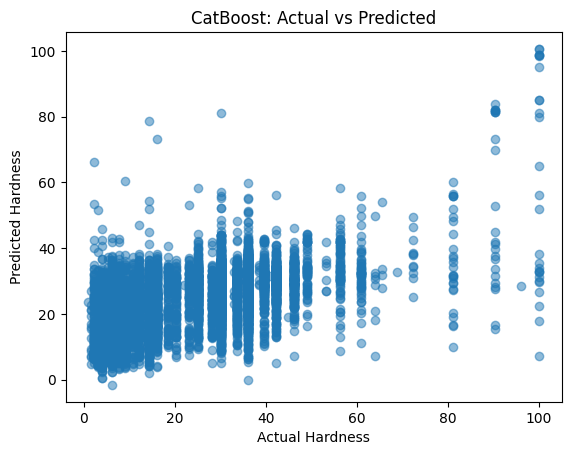

In [54]:
# Scatter plot for CatBoost predictions vs actual values
plt.scatter(y_train, catboost_preds, alpha=0.5)
plt.title('CatBoost: Actual vs Predicted')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')
plt.show()

### 5.3 LGBM Model

In [55]:
lgbm_model = LGBMRegressor(random_state=42)
lgbm_preds = cross_val_predict(lgbm_model, X_train, y_train, cv=5)
lgbm_mse = mean_squared_error(y_train, lgbm_preds)
print(f'LGBM Mean Squared Error: {lgbm_mse}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3
[LightGBM] [Info] Start training from score 24.663579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3
[LightGBM] [Info] Start training from score 24.220146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 666

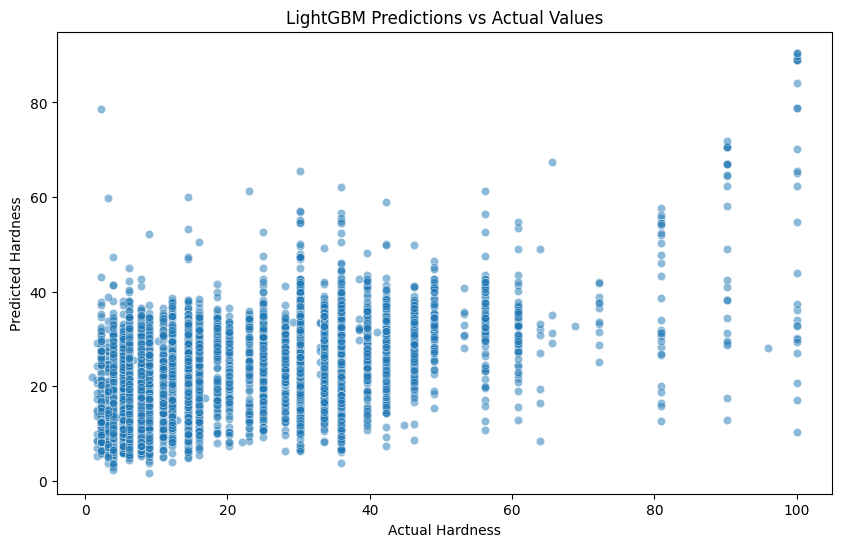

In [56]:
# Scatter plot for LightGBM predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=lgbm_preds, alpha=0.5)
plt.title('LightGBM Predictions vs Actual Values')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')
plt.show()

### 5.4 XGB Model

In [57]:
xgb_model = XGBRegressor(random_state=42)
xgb_preds = cross_val_predict(xgb_model, X_train, y_train, cv=5)
xgb_mse = mean_squared_error(y_train, xgb_preds)
print(f'XGB Mean Squared Error: {xgb_mse}')

XGB Mean Squared Error: 170.5667454845043


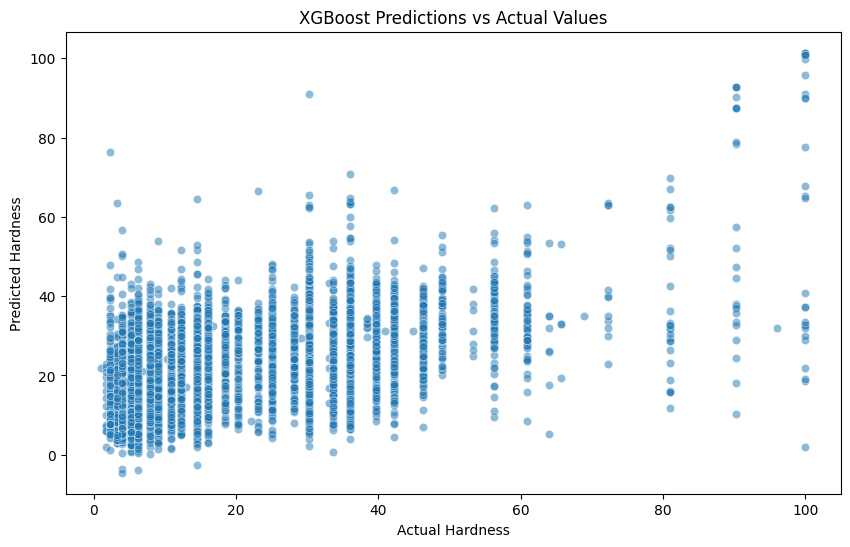

In [58]:
# Scatter plot for XGBoost predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=xgb_preds, alpha=0.5)
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')
plt.show()

### 5.5 Voting Regressor

In [59]:
voting_model = VotingRegressor([('rf', rf_model), ('catboost', catboost_model), ('lgbm', lgbm_model), ('xgb', xgb_model)])
voting_preds = cross_val_predict(voting_model, X_train, y_train, cv=5)
voting_mse = mean_squared_error(y_train, voting_preds)
print(f'Voting Regressor Mean Squared Error: {voting_mse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3
[LightGBM] [Info] Start training from score 24.663579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3
[LightGBM] [Info] Start training from score 24.220146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3
[LightGBM] [Info] Start training f

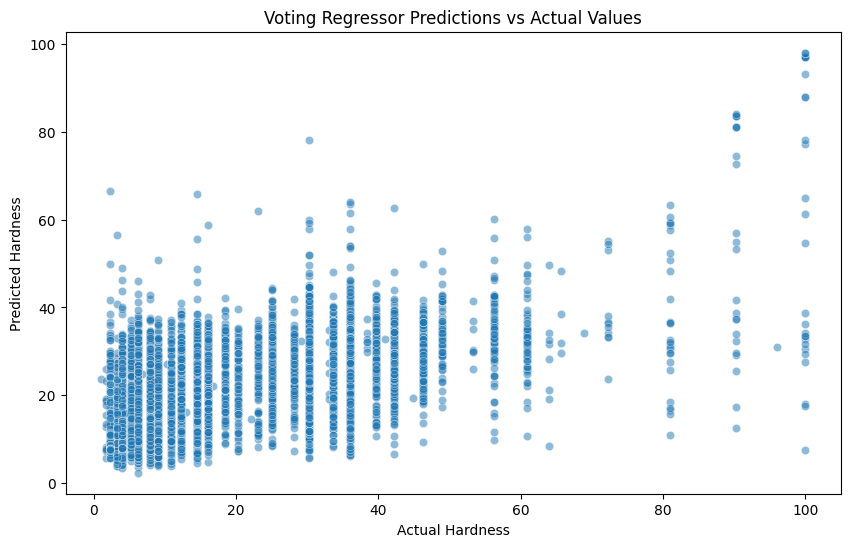

In [60]:
# Scatter plot for Voting Regressor predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=voting_preds, alpha=0.5)
plt.title('Voting Regressor Predictions vs Actual Values')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')
plt.show()

### 5.6 Neural Network based on VR Preds

In [61]:
# Assuming X_train is your original feature set
nn_model = MLPRegressor(random_state=42, max_iter=1000)
nn_preds = cross_val_predict(nn_model, X_train, y_train, cv=5)
nn_mse = mean_squared_error(y_train, nn_preds)
print(f'Neural Network Mean Squared Error: {nn_mse}')

Neural Network Mean Squared Error: 215.46265007000378


In [62]:
# Define models and their MSE values
models = ['RandomForest', 'CatBoost', 'LGBM', 'VotingRegressor', 'NeuralNetwork']
mse_values = [rf_mse, catboost_mse, lgbm_mse, voting_mse, nn_mse]

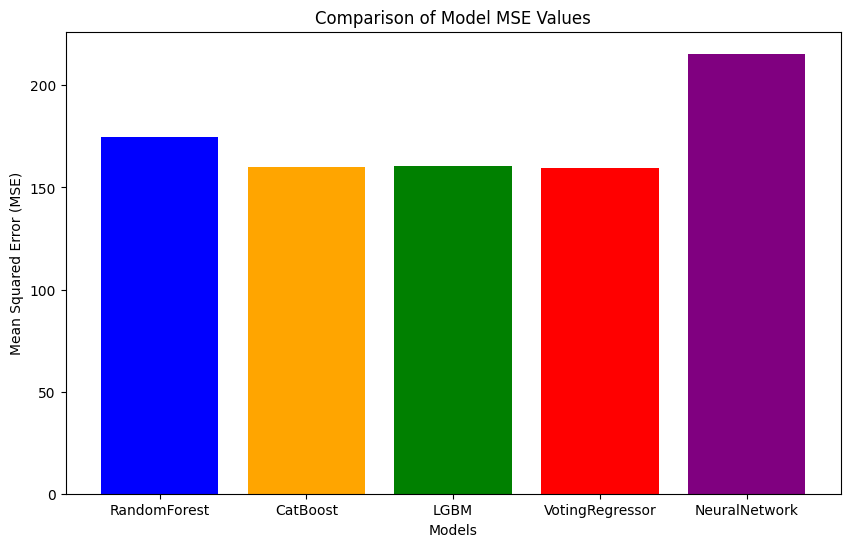

In [63]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model MSE Values')
plt.show()

## 6. Artificial Neural Network

In [64]:
# Assuming you have a DataFrame named 'train' with features and target
# Adjust the column names and target variable as needed
features = train.drop(columns=['Hardness'])
target = train['Hardness']

In [65]:
# Define the model
model = Sequential()

In [66]:
# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=features.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [67]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [68]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Train the model
history = model.fit(
    features, target,
    epochs=50,  # You can adjust the number of epochs
    batch_size=32,
    validation_split=0.2  # You can adjust the validation split
)

Epoch 1/50


261/261 [==============================] - 3s 4ms/step - loss: 28574820352.0000 - mae: 41948.3555 - val_loss: 105341904.0000 - val_mae: 10180.7949
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 356053.8750 - mae: 179.9982 - val_loss: 1061.0830 - val_mae: 28.4924
Epoch 3/50
261/261 [==============================] - 1s 2ms/step - loss: 328.1065 - mae: 14.4948 - val_loss: 1215.6849 - val_mae: 31.7661
Epoch 4/50
261/261 [==============================] - 1s 3ms/step - loss: 402.0723 - mae: 15.8554 - val_loss: 1778.3379 - val_mae: 39.3887
Epoch 5/50
261/261 [==============================] - 1s 2ms/step - loss: 504.9778 - mae: 17.0441 - val_loss: 972.6118 - val_mae: 27.8770
Epoch 6/50
261/261 [==============================] - 1s 3ms/step - loss: 407.7424 - mae: 15.8446 - val_loss: 3061.4956 - val_mae: 52.8480
Epoch 7/50
261/261 [==============================] - 1s 3ms/step - loss: 49530780.0000 - mae: 1471.5763 - val_loss: 258360800.0000 - val_mae: 15943.8604
E

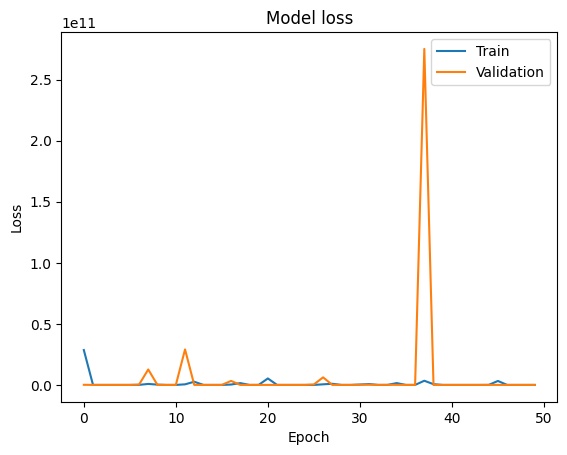

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 7. 🏁 Creating 'submission.csv'

In [71]:
SPLITS = 5  # Replace 5 with the actual value you intend to use
REPEATS = 3  # Replace 3 with the actual value you intend to use

# Assuming public_work is a DataFrame or a variable with the necessary data
public_work = pd.DataFrame({
    'id': [1, 2, 3],  # Replace with your actual data
    'Hardness': [10.0, 15.0, 20.0]  # Replace with your actual data
})
# Other code...

sample_submission["Hardness"] = sample_submission["Hardness"] / (SPLITS * REPEATS)
sample_submission["Hardness"] = 0.5 * public_work["Hardness"] + 0.5 * sample_submission["Hardness"]
sample_submission.to_csv("submission.csv", index=False, header=True)
